# Project Code : PRCP-1016- Heart Disease Prediction

## Business Case: Create a model predicting potential heart diseases in people using machine learning algorithm.

### Importing Libraries

In [10]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline 

import warnings
warnings.filterwarnings('ignore')

### Loading Data Set

In [70]:
label = pd.read_csv('label_data.csv')

In [158]:
val = pd.read_csv('heart disease.csv')

In [159]:
merge = pd.merge(val, label, on = 'patient_id')

In [160]:
merge

,patient_id,slope_of_peak_exercise_st_segment,thal,resting_blood_pressure,chest_pain_type,num_major_vessels,fasting_blood_sugar_gt_120_mg_per_dl,resting_ekg_results,serum_cholesterol_mg_per_dl,oldpeak_eq_st_depression,sex,age,max_heart_rate_achieved,exercise_induced_angina,heart_disease_present
0,0z64un,1,normal,128,2,0,0,2,308,0.0,1,45,170,0,0
1,ryoo3j,2,normal,110,3,0,0,0,214,1.6,0,54,158,0,0
2,yt1s1x,1,normal,125,4,3,0,2,304,0.0,1,77,162,1,1
3,l2xjde,1,reversible_defect,152,4,0,0,0,223,0.0,1,40,181,0,1
4,oyt4ek,3,reversible_defect,178,1,0,0,2,270,4.2,1,59,145,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
175,5qfar3,2,reversible_defect,125,4,2,1,0,254,0.2,1,67,163,0,1
176,2s2b1f,2,normal,180,4,0,0,1,327,3.4,0,55,117,1,1
177,nsd00i,2,reversible_defect,125,3,0,0,0,309,1.8,1,64,131,1,1
178,0xw93k,1,normal,124,3,2,1,0,255,0.0,1,48,175,0,0


In [161]:
# Copying data set to keep as Back-up

new_merge = merge.copy()

In [162]:
new_merge

,patient_id,slope_of_peak_exercise_st_segment,thal,resting_blood_pressure,chest_pain_type,num_major_vessels,fasting_blood_sugar_gt_120_mg_per_dl,resting_ekg_results,serum_cholesterol_mg_per_dl,oldpeak_eq_st_depression,sex,age,max_heart_rate_achieved,exercise_induced_angina,heart_disease_present
0,0z64un,1,normal,128,2,0,0,2,308,0.0,1,45,170,0,0
1,ryoo3j,2,normal,110,3,0,0,0,214,1.6,0,54,158,0,0
2,yt1s1x,1,normal,125,4,3,0,2,304,0.0,1,77,162,1,1
3,l2xjde,1,reversible_defect,152,4,0,0,0,223,0.0,1,40,181,0,1
4,oyt4ek,3,reversible_defect,178,1,0,0,2,270,4.2,1,59,145,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
175,5qfar3,2,reversible_defect,125,4,2,1,0,254,0.2,1,67,163,0,1
176,2s2b1f,2,normal,180,4,0,0,1,327,3.4,0,55,117,1,1
177,nsd00i,2,reversible_defect,125,3,0,0,0,309,1.8,1,64,131,1,1
178,0xw93k,1,normal,124,3,2,1,0,255,0.0,1,48,175,0,0


### Domain Analysis

 1. **patient_id :** Unique ID/values given to each patient.
 
 2. **slope_of_peak_exercise_st_segment :** It is a reading given by an electrocardiogram which indicates the quality of blood flow to the heart.
 3. **thal :** This is the result of the Thallium stress test which provides the measure of the blood flow to the heart.
 4. **resting_blood_pressure :** It gives the measure of the patient's blood pressure in resting state.
 5. **chest_pain_type :** It gives the type of chest pain the patient encounters. It has input rating values i.e., 1 to 4.
 6. **num_major_vessels :** It gives the number of major vessels (0 - 3) which are labelled by flouroscopy.
 7. **fasting_blood_sugar_gt_120_mg_per_dl :** It gives whether the patient blood sugar lever in fasting stage is 120 mg/dL or not. Input value is either 1 (Yes) or 0 (No).
 8. **resting_ekg_results :** It provides the measure of resting electrogardiograpic results and it's value ranges from 0 to 2.
 9. **serum_cholesterol_mg_per_dl :** It give the cholesterol amount detected in the serum in mg/dL.
 10. **oldpeak_eq_st_depression :** It is the measure of the ST depression which is induced by exercise in comparison to resting state. This gives the measure of abnormality in electrocardiogram
 11. **sex :** It gives the gender of the patient. The values are '0' for Female patients and '1' for Male patients
 12. **age :** It gives age of patients in years.
 13. **max_heart_rate_achieved :** It give the maximum heart rate achieved by a patient (beats per minute).
 14. **exercise_induced_angina :** It gives the value (0 - Not induced; 1 - Induced) of chest pain induced by exercising 
 15. **heart_disease_present :** Output result whether heart disease is present or not in patient.

### Basic Checks and Statistical Analysis

In [166]:
merge

,patient_id,slope_of_peak_exercise_st_segment,thal,resting_blood_pressure,chest_pain_type,num_major_vessels,fasting_blood_sugar_gt_120_mg_per_dl,resting_ekg_results,serum_cholesterol_mg_per_dl,oldpeak_eq_st_depression,sex,age,max_heart_rate_achieved,exercise_induced_angina,heart_disease_present
0,0z64un,1,normal,128,2,0,0,2,308,0.0,1,45,170,0,0
1,ryoo3j,2,normal,110,3,0,0,0,214,1.6,0,54,158,0,0
2,yt1s1x,1,normal,125,4,3,0,2,304,0.0,1,77,162,1,1
3,l2xjde,1,reversible_defect,152,4,0,0,0,223,0.0,1,40,181,0,1
4,oyt4ek,3,reversible_defect,178,1,0,0,2,270,4.2,1,59,145,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
175,5qfar3,2,reversible_defect,125,4,2,1,0,254,0.2,1,67,163,0,1
176,2s2b1f,2,normal,180,4,0,0,1,327,3.4,0,55,117,1,1
177,nsd00i,2,reversible_defect,125,3,0,0,0,309,1.8,1,64,131,1,1
178,0xw93k,1,normal,124,3,2,1,0,255,0.0,1,48,175,0,0


In [167]:
merge.shape

(180, 15)

In [168]:
merge.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 180 entries, 0 to 179
Data columns (total 15 columns):
 #   Column                                Non-Null Count  Dtype  
---  ------                                --------------  -----  
 0   patient_id                            180 non-null    object 
 1   slope_of_peak_exercise_st_segment     180 non-null    int64  
 2   thal                                  180 non-null    object 
 3   resting_blood_pressure                180 non-null    int64  
 4   chest_pain_type                       180 non-null    int64  
 5   num_major_vessels                     180 non-null    int64  
 6   fasting_blood_sugar_gt_120_mg_per_dl  180 non-null    int64  
 7   resting_ekg_results                   180 non-null    int64  
 8   serum_cholesterol_mg_per_dl           180 non-null    int64  
 9   oldpeak_eq_st_depression              180 non-null    float64
 10  sex                                   180 non-null    int64  
 11  age                

**Observation:**
- No Null values
- 2 Categorical/text data, 1 float data type, 12 int data type

In [170]:
merge.describe()

,slope_of_peak_exercise_st_segment,resting_blood_pressure,chest_pain_type,num_major_vessels,fasting_blood_sugar_gt_120_mg_per_dl,resting_ekg_results,serum_cholesterol_mg_per_dl,oldpeak_eq_st_depression,sex,age,max_heart_rate_achieved,exercise_induced_angina,heart_disease_present
count,180.000000,180.000000,180.000000,180.000000,180.000000,180.000000,180.000000,180.000000,180.000000,180.000000,180.000000,180.000000,180.000000
mean,1.550000,131.311111,3.155556,0.694444,0.161111,1.050000,249.211111,1.010000,0.688889,54.811111,149.483333,0.316667,0.444444
std,0.618838,17.010443,0.938454,0.969347,0.368659,0.998742,52.717969,1.121357,0.464239,9.334737,22.063513,0.466474,0.498290
min,1.000000,94.000000,1.000000,0.000000,0.000000,0.000000,126.000000,0.000000,0.000000,29.000000,96.000000,0.000000,0.000000
25%,1.000000,120.000000,3.000000,0.000000,0.000000,0.000000,213.750000,0.000000,0.000000,48.000000,132.000000,0.000000,0.000000
50%,1.000000,130.000000,3.000000,0.000000,0.000000,2.000000,245.500000,0.800000,1.000000,55.000000,152.000000,0.000000,0.000000
75%,2.000000,140.000000,4.000000,1.000000,0.000000,2.000000,281.250000,1.600000,1.000000,62.000000,166.250000,1.000000,1.000000
max,3.000000,180.000000,4.000000,3.000000,1.000000,2.000000,564.000000,6.200000,1.000000,77.000000,202.000000,1.000000,1.000000


**Observation:**
- No Constant data
- No Corrupt data

### Exploratory Data Analysis

#### Univariate Anlysis - Sweetviz Report

In [174]:
# Installation

!pip install sweetviz

In [175]:
import sweetviz as sv

report = sv.analyze(merge)
report.show_html()

                                             |                                             | [  0%]   00:00 ->…

Report SWEETVIZ_REPORT.html was generated! NOTEBOOK/COLAB USERS: the web browser MAY not pop up, regardless, the report IS saved in your notebook/colab files.


**File path -** file:///C:/Users/shaik%20sadiq/SWEETVIZ_REPORT.html

##### Count plot

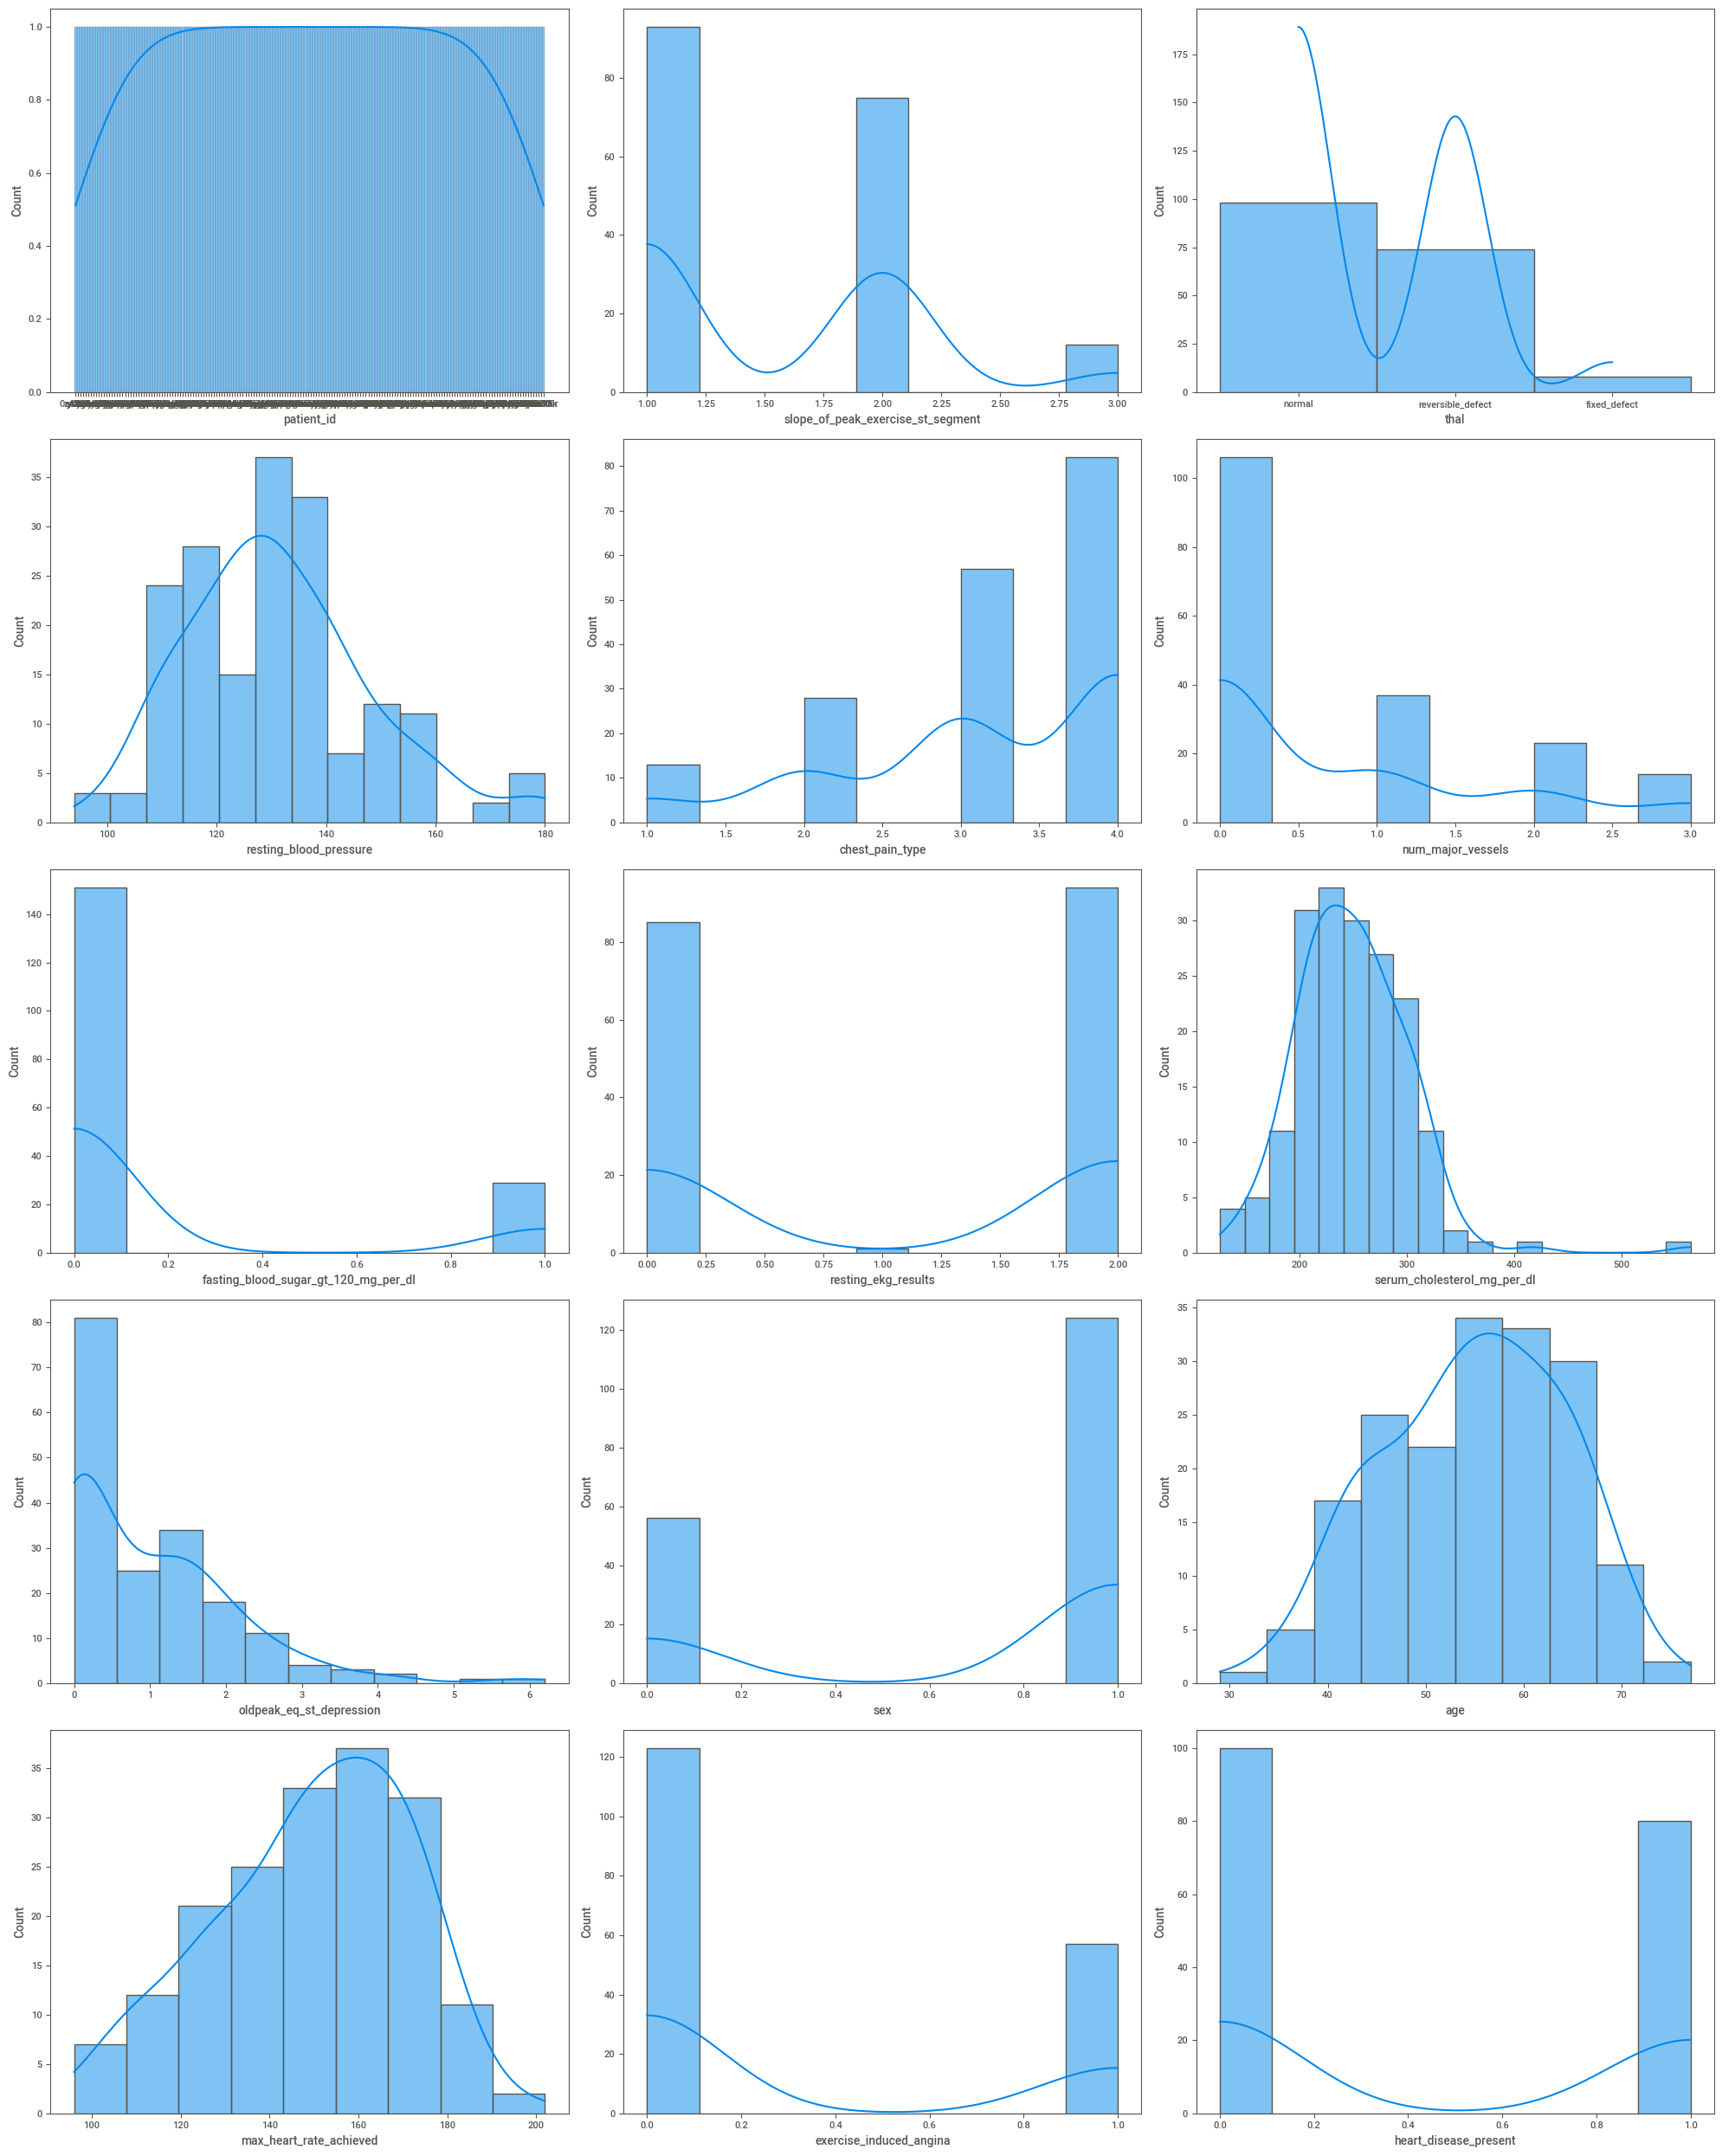

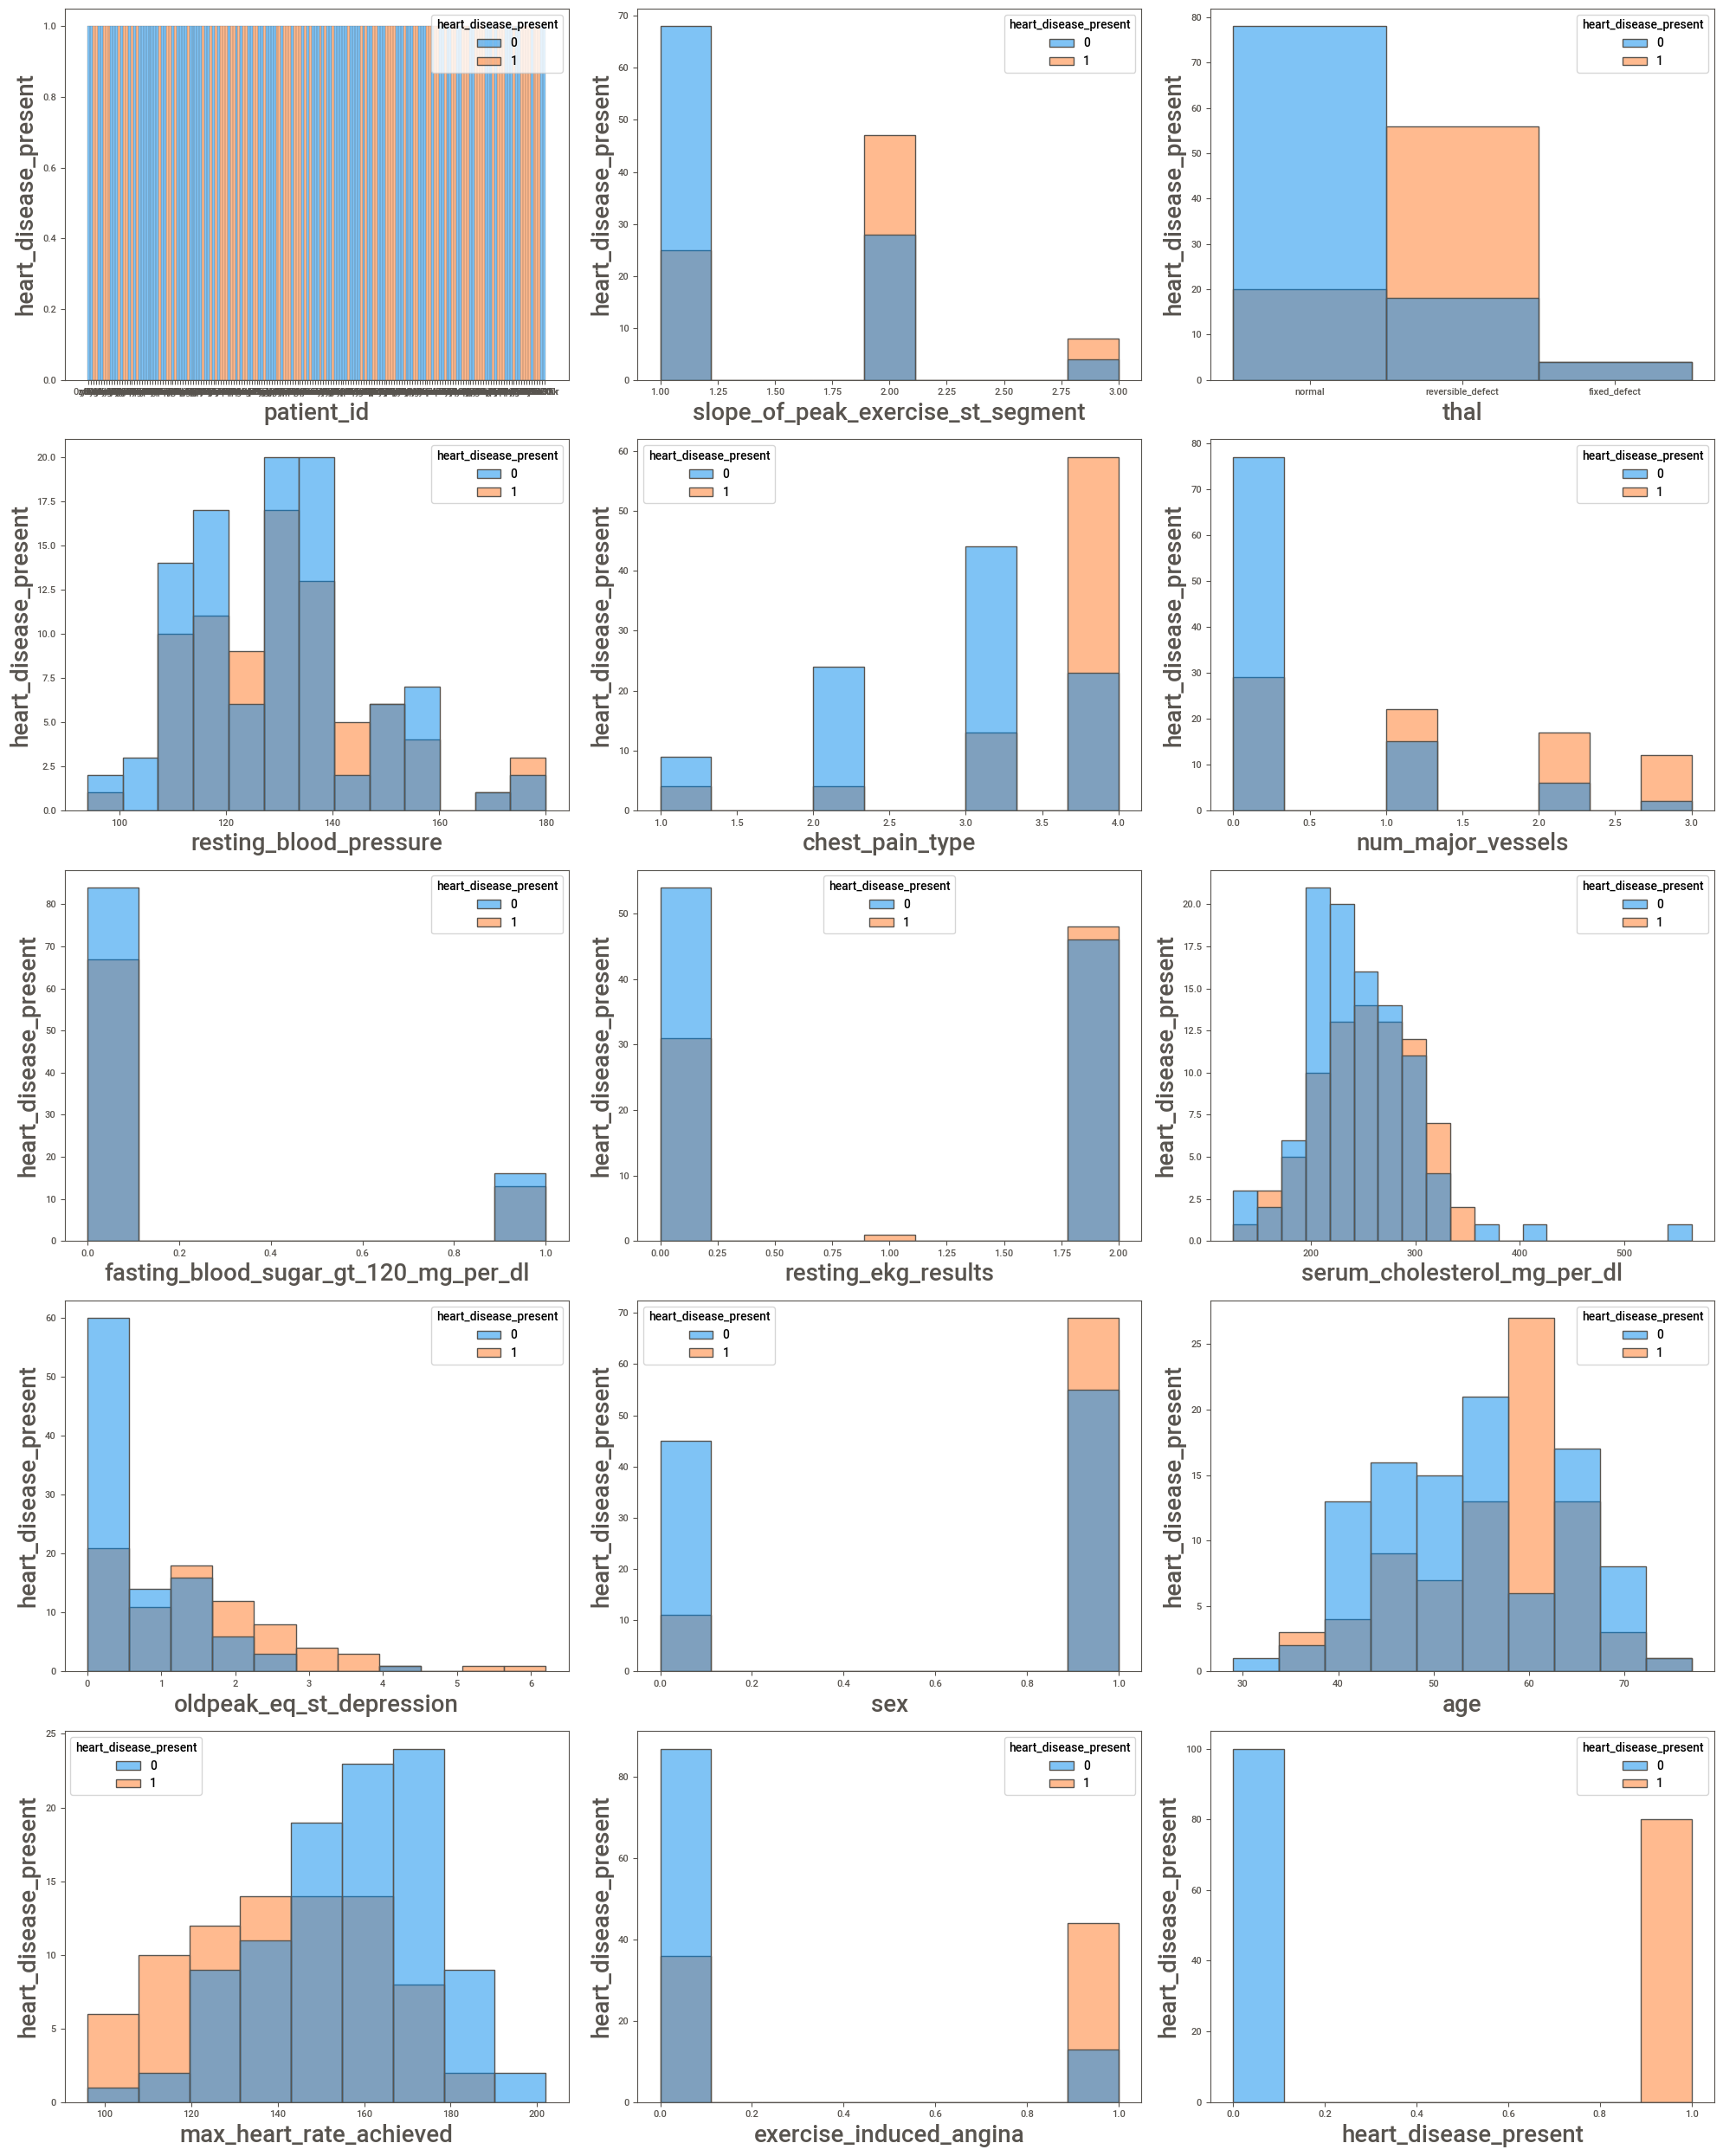

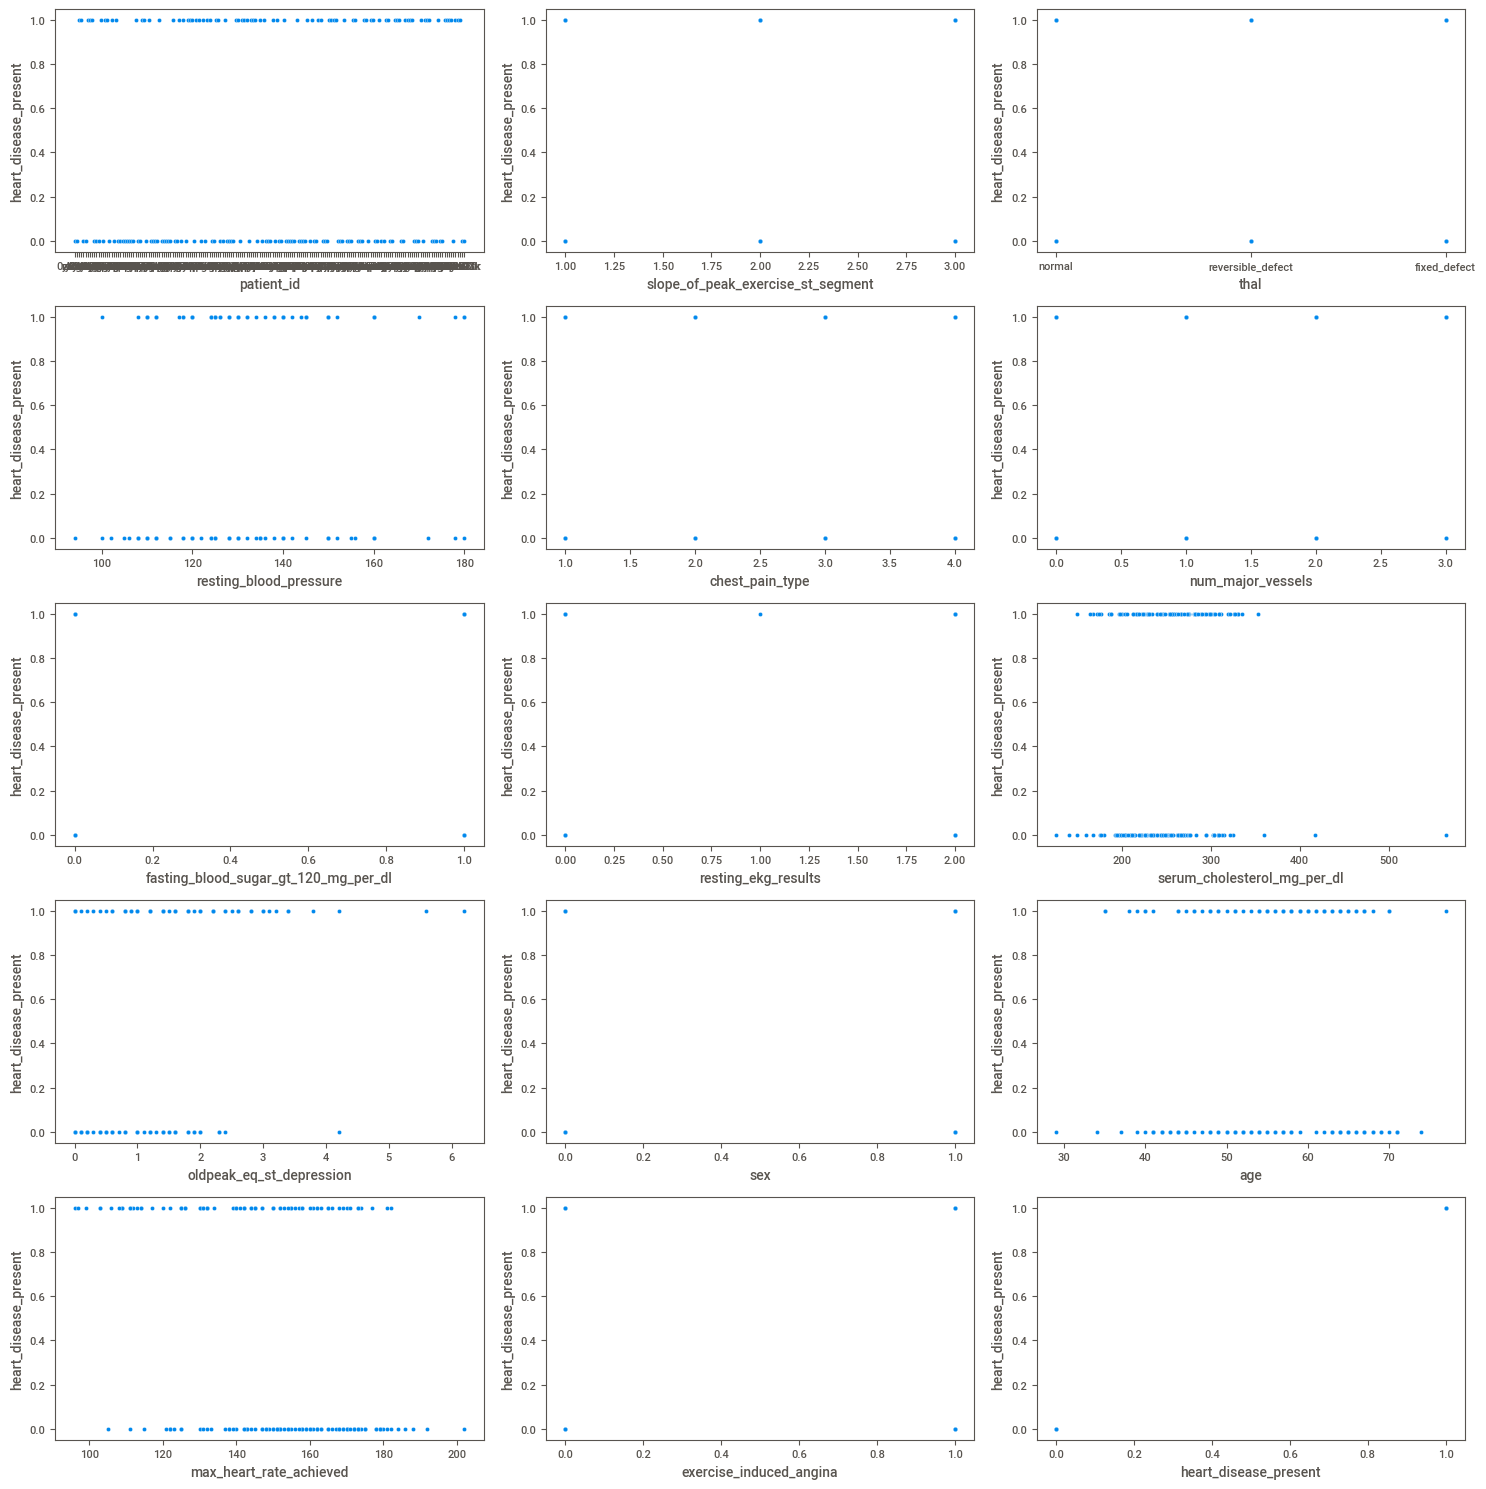

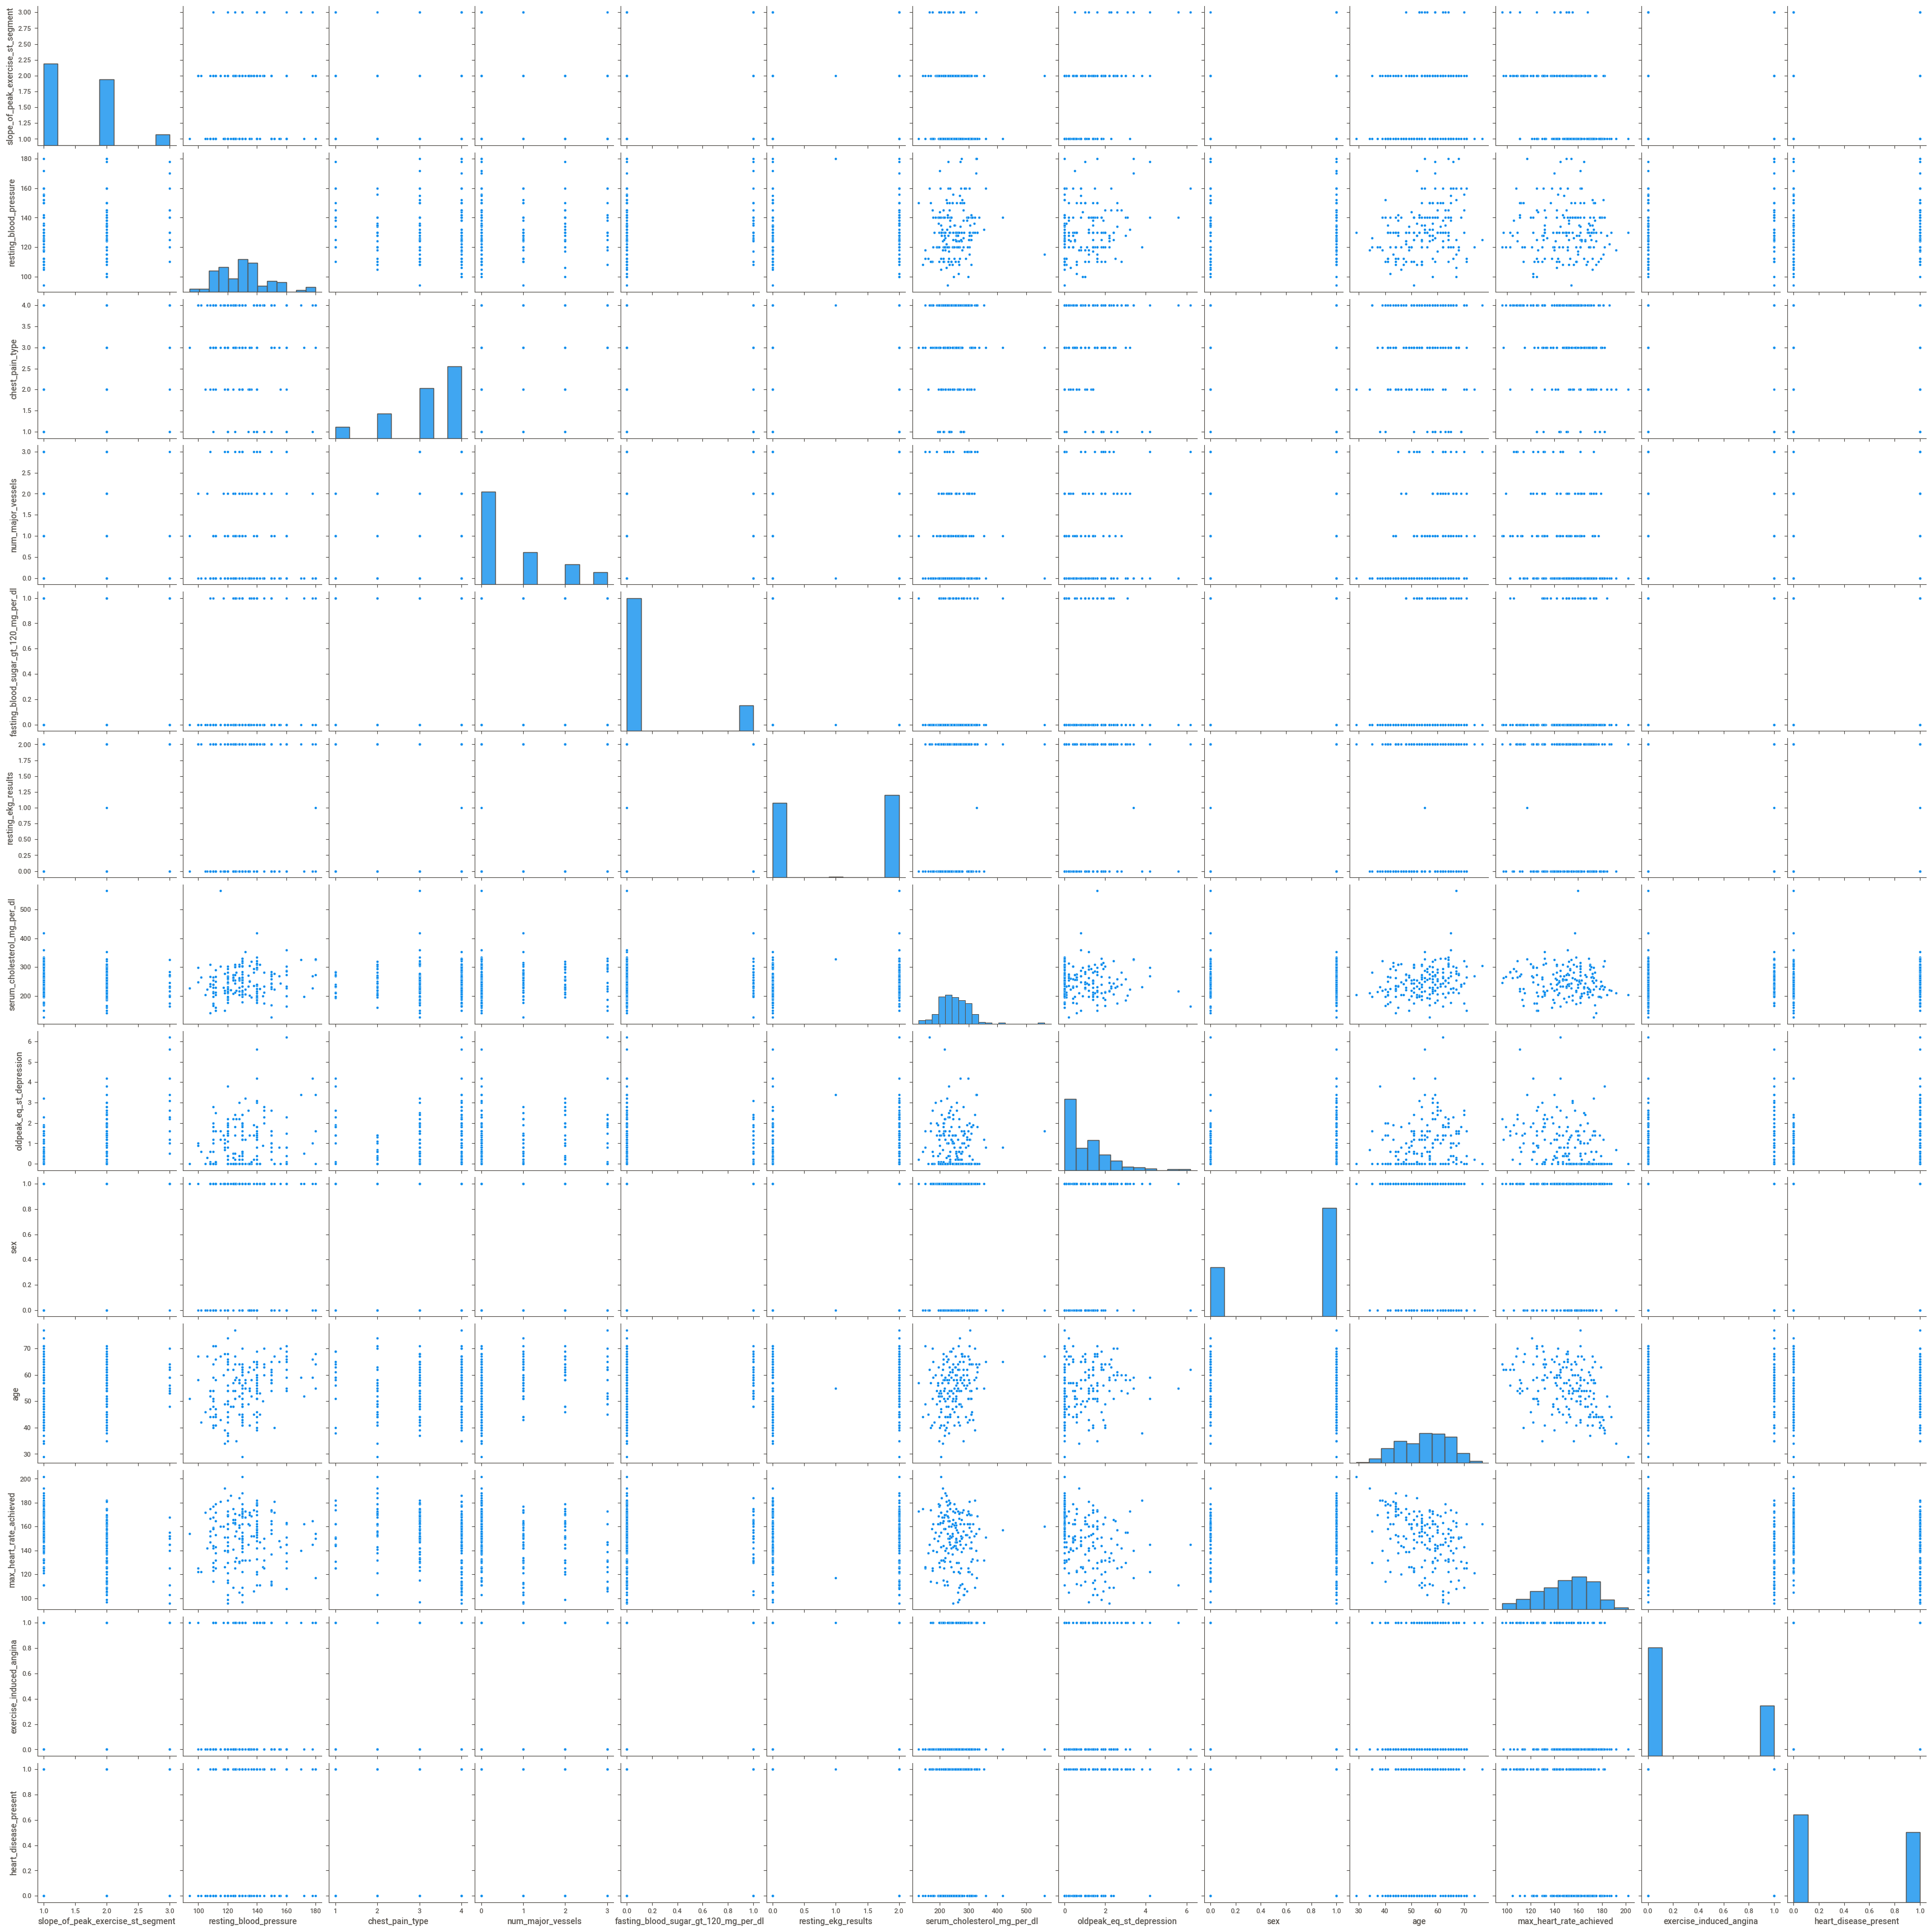

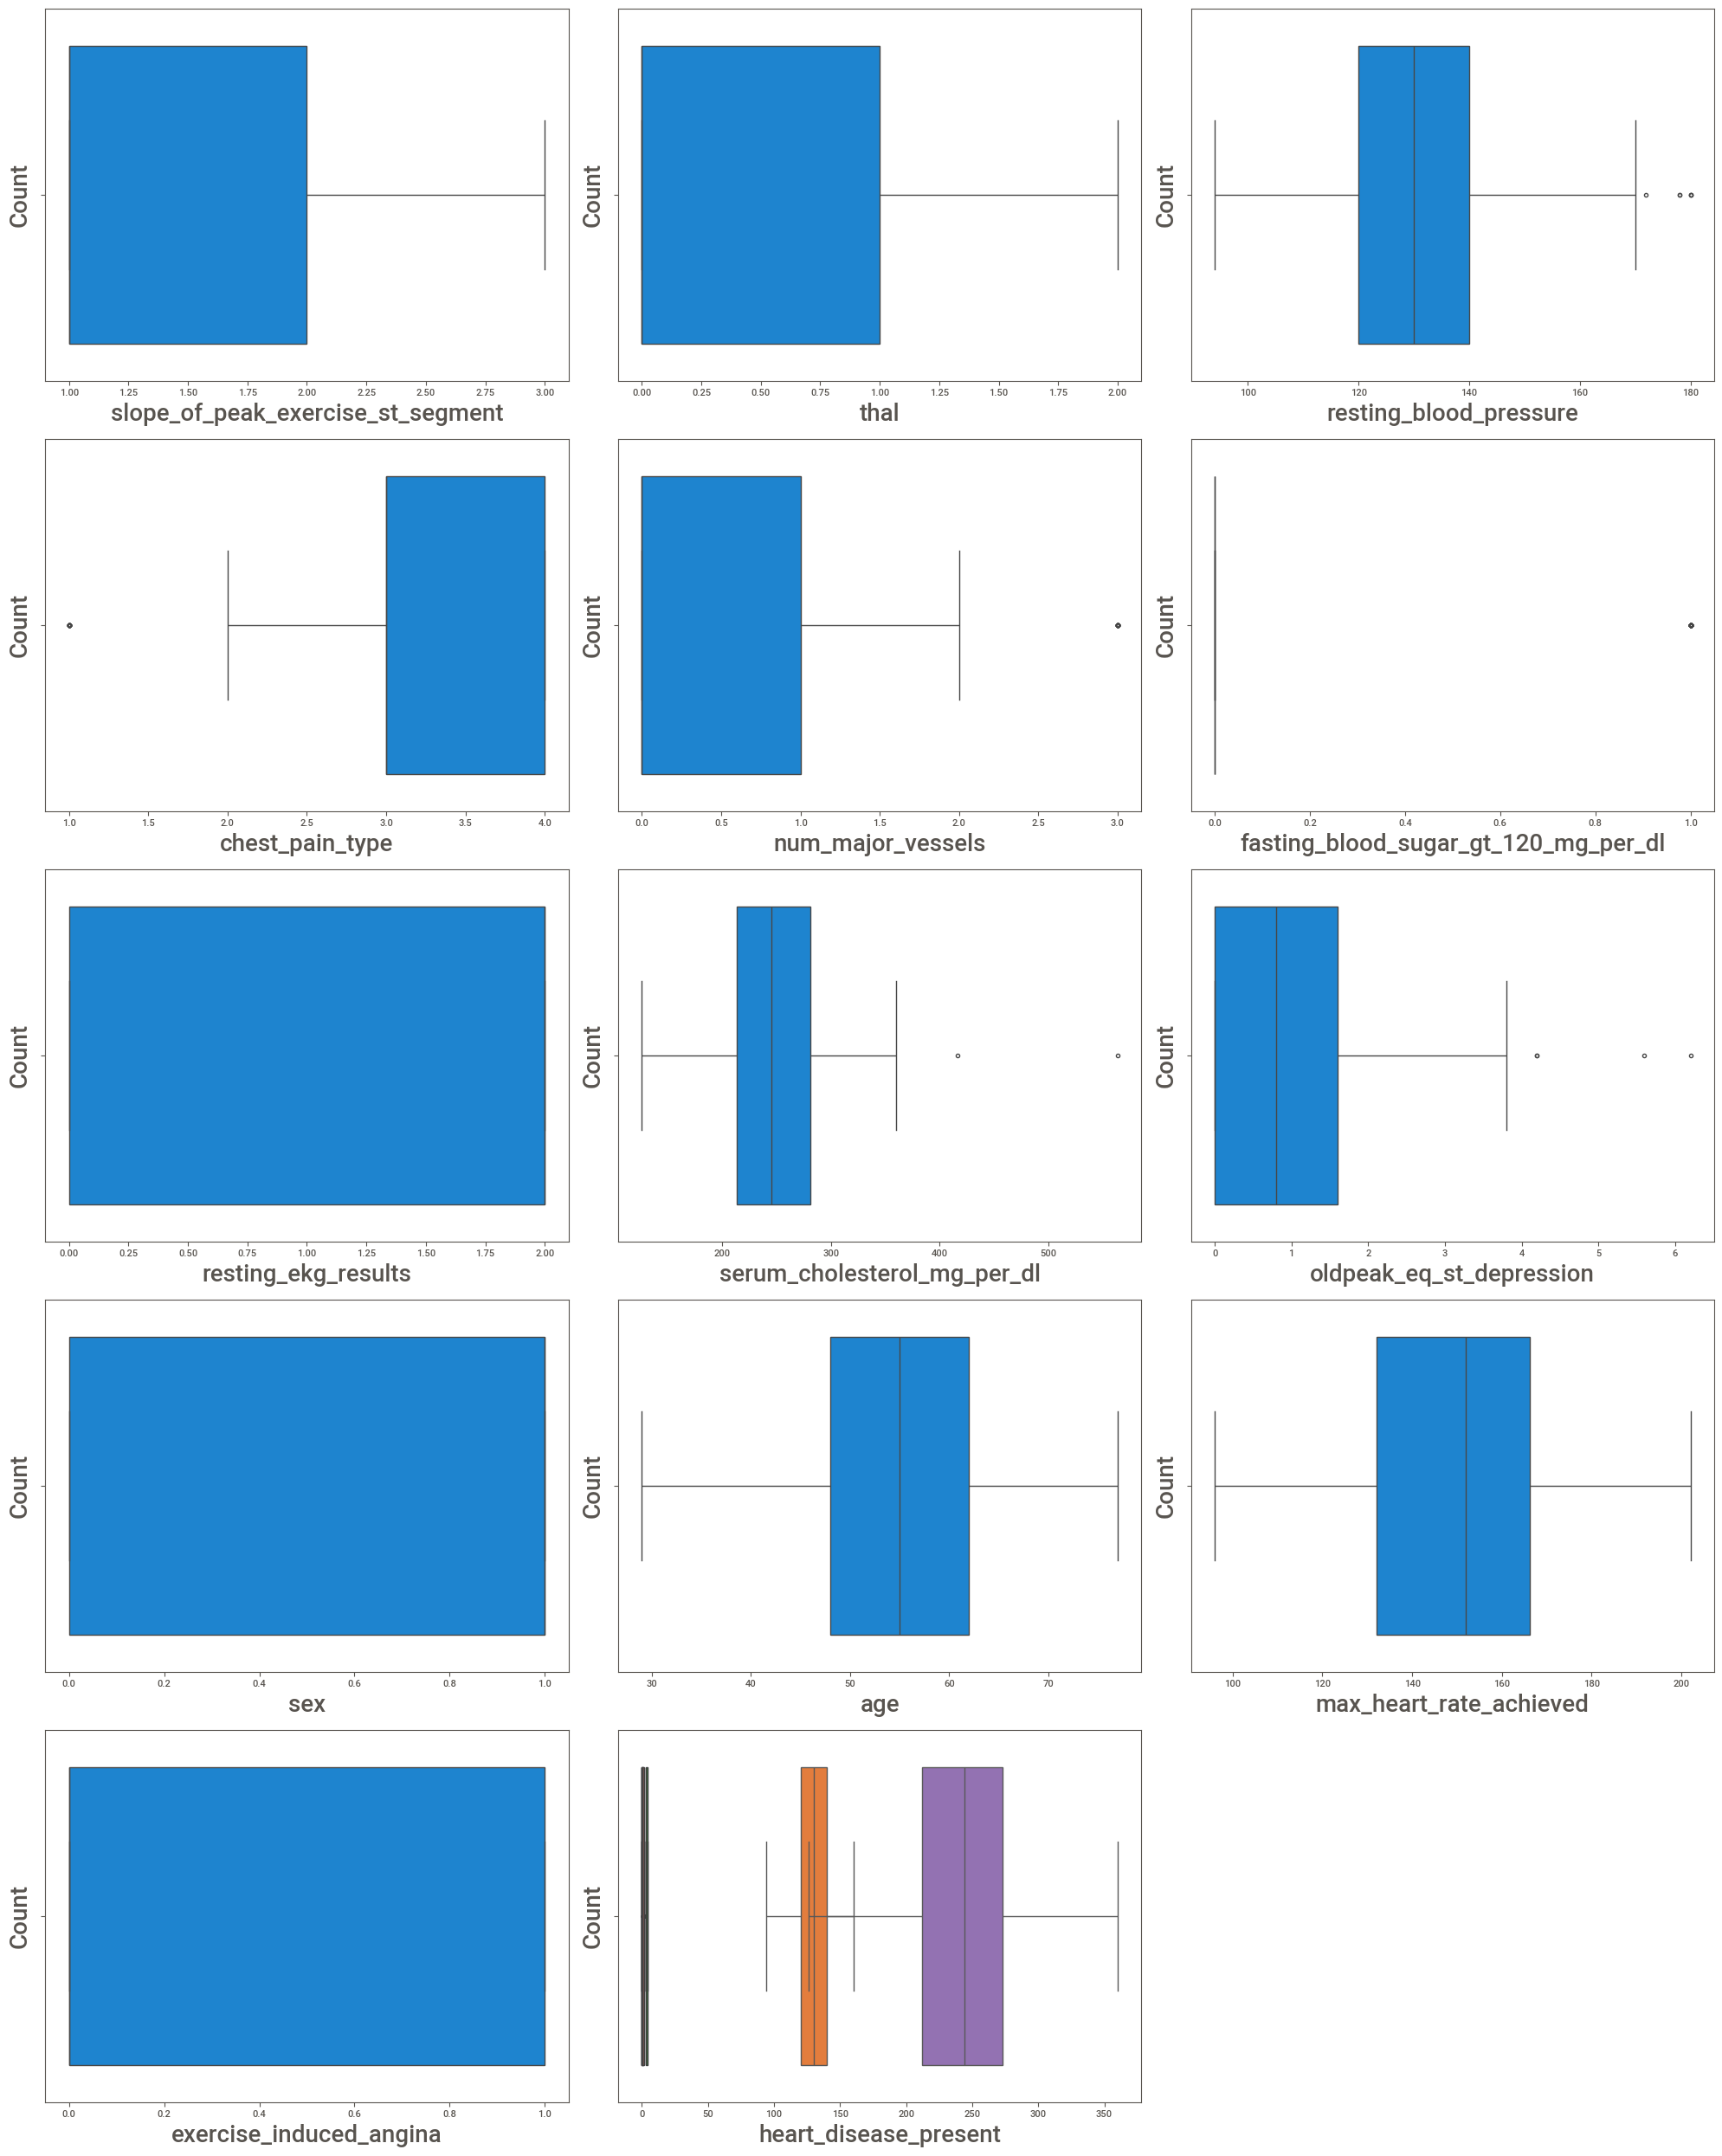

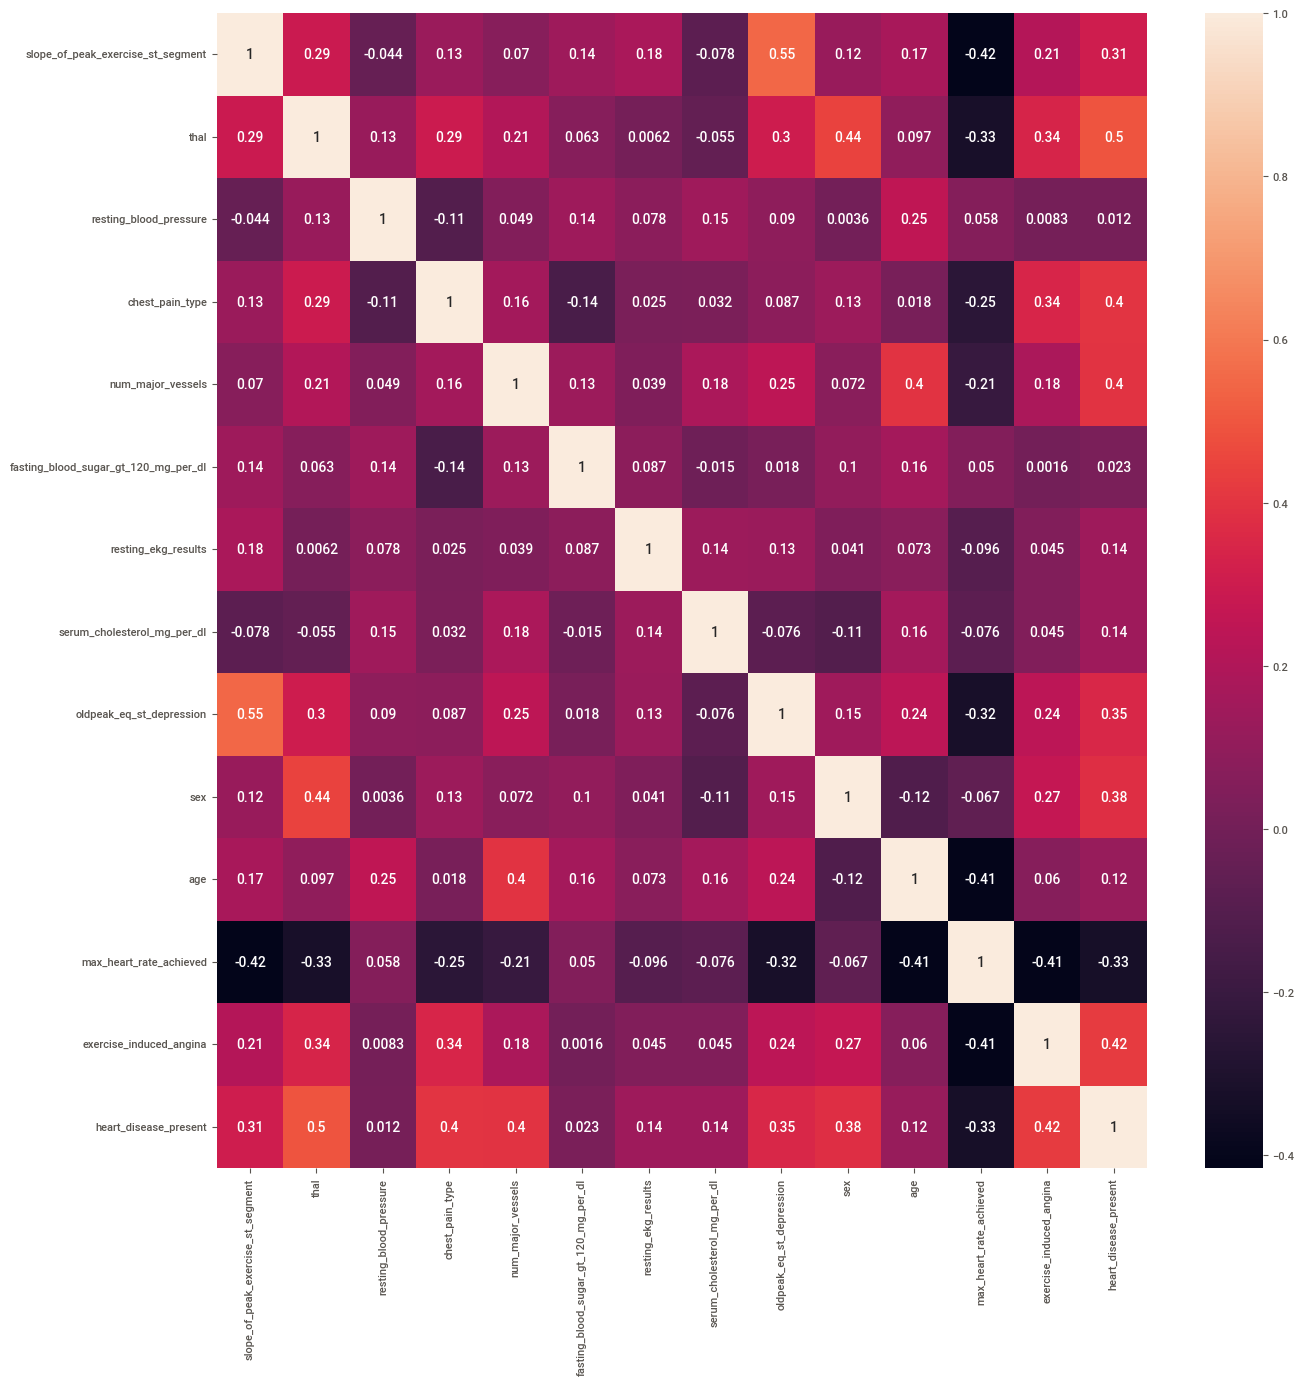

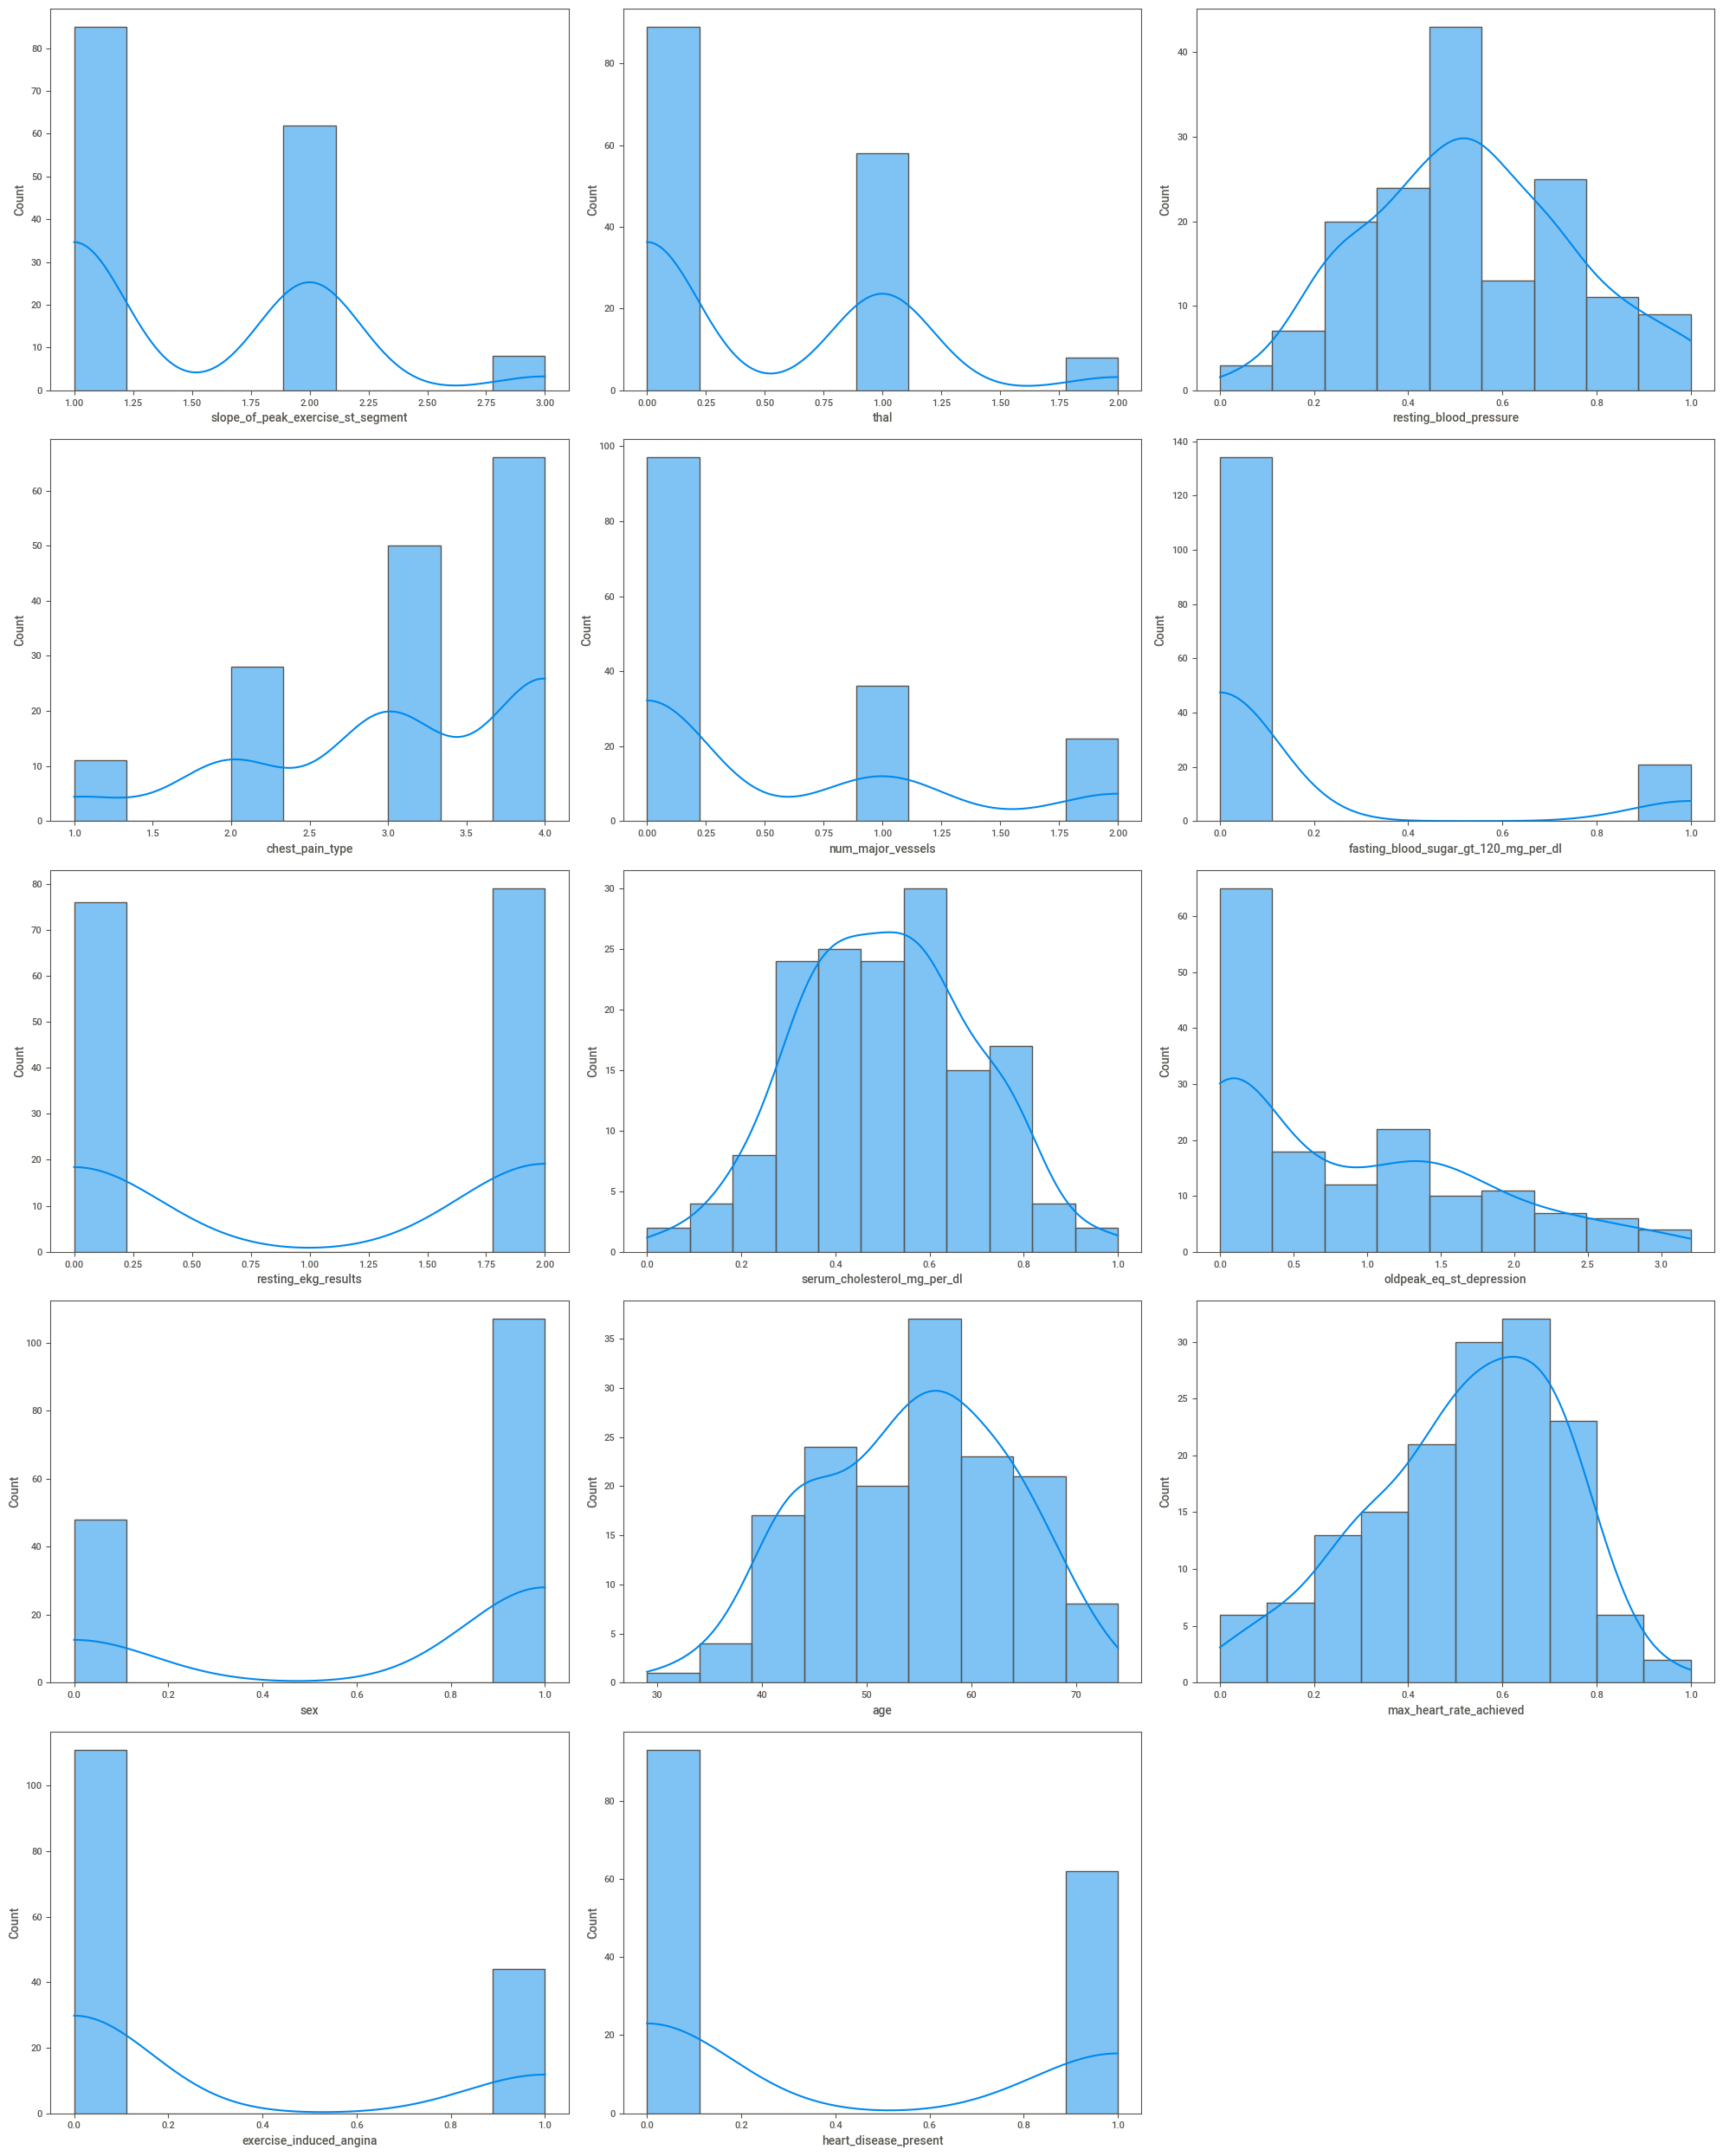

In [327]:
plt.figure(figsize = (20, 25), facecolor = 'white')
plotnum = 1
for column in merge:
    plt.subplot(5, 3, plotnum)
    sns.histplot(merge[column], kde = True)
    plotnum = plotnum + 1
plt.tight_layout()
plt.show()

#### Bivariate Analysis

##### Histogram plot

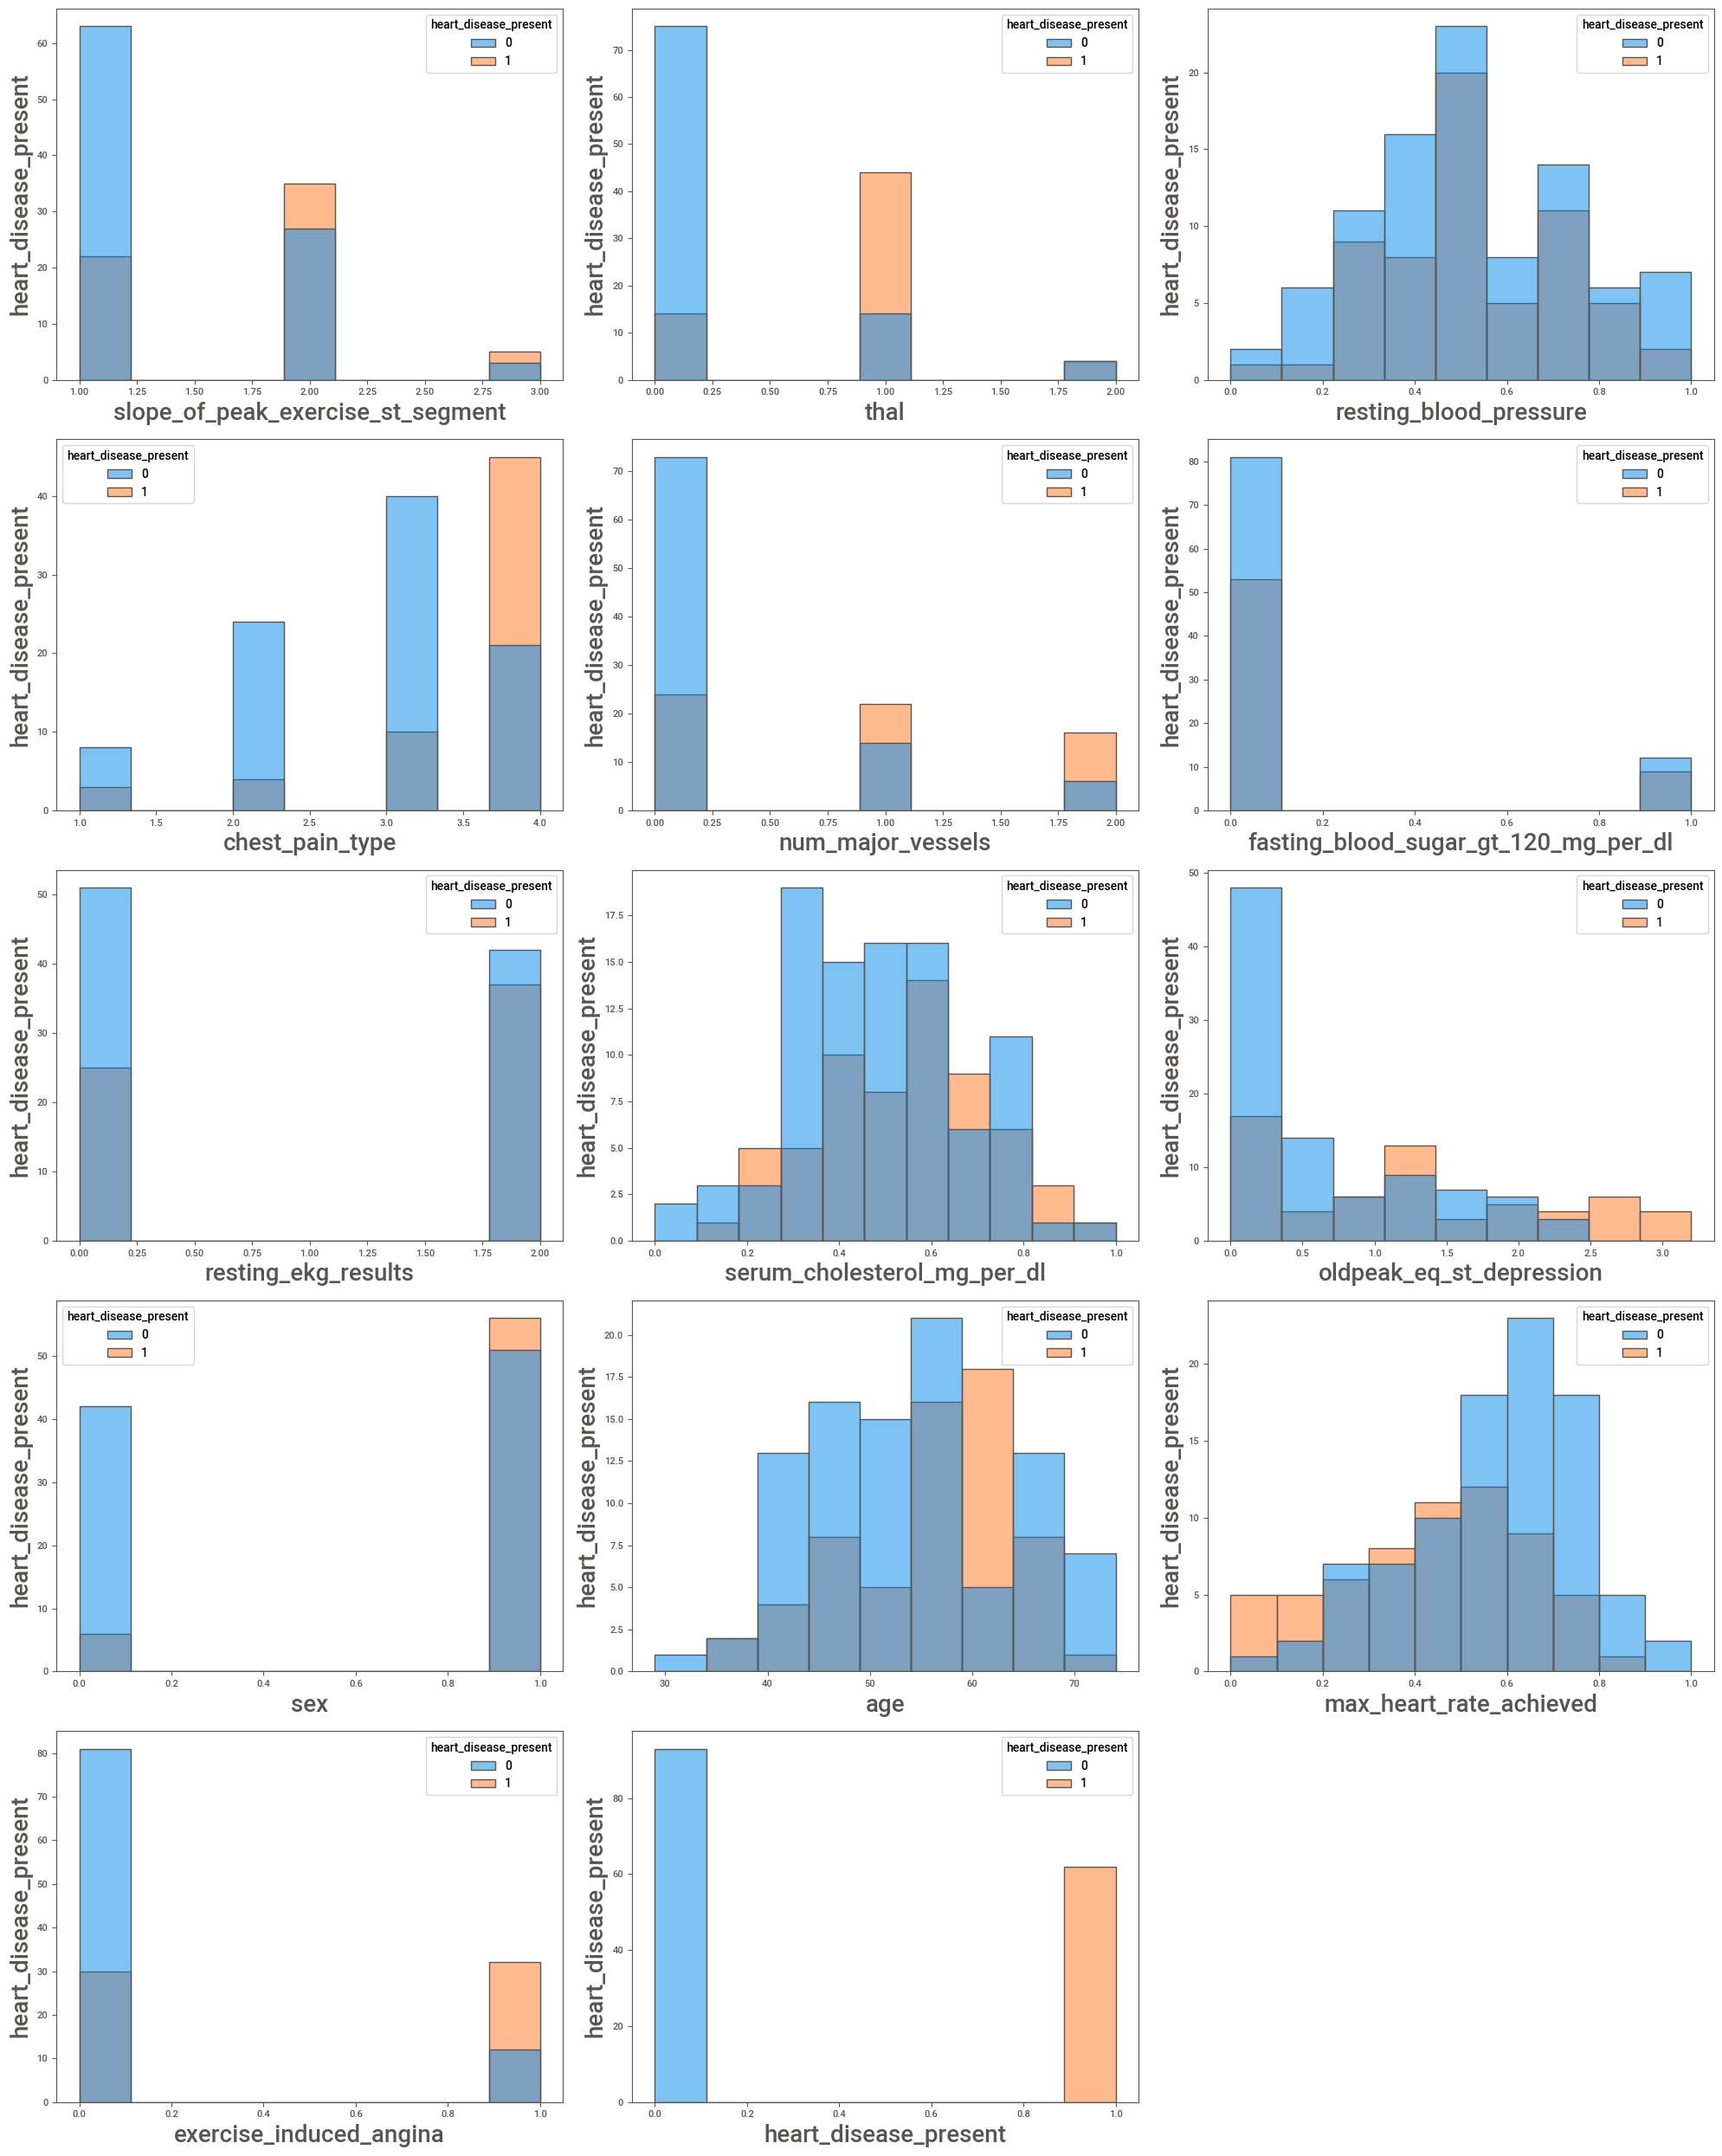

In [328]:
plt.figure(figsize = (20, 25), facecolor = 'white') 
plotnumber = 1      

for column in merge:         
    if plotnumber <= 16 :
        ax = plt.subplot(5, 3, plotnumber)
        sns.histplot(x = merge[column], hue = merge['heart_disease_present'])
        plt.xlabel(column, fontsize = 20)                    
        plt.ylabel('heart_disease_present', fontsize = 20)
    plotnumber += 1                
plt.tight_layout()
plt.show()

##### Scatter Plot

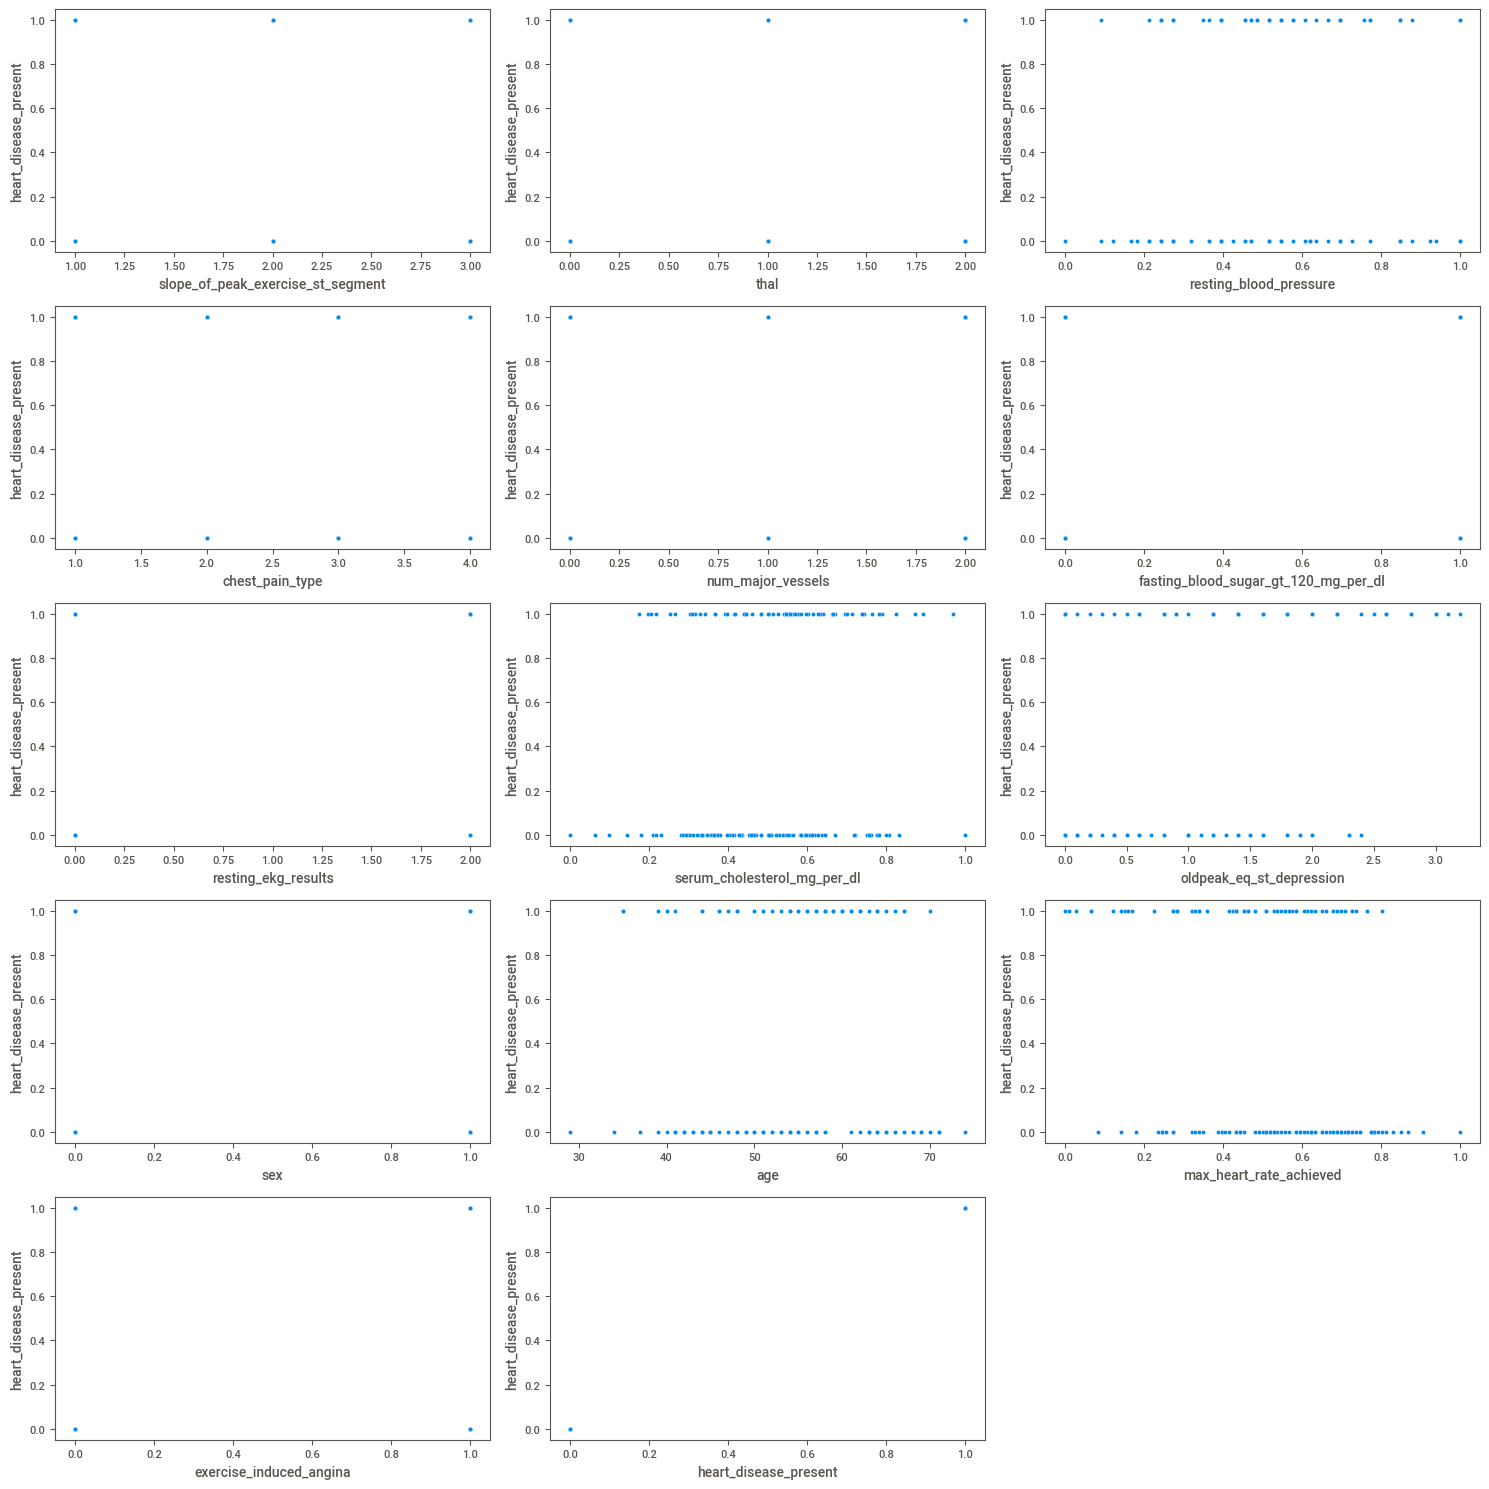

In [331]:
plt.figure(figsize=(15,15))
plotnumber=1
for column in merge:
    plt.subplot(5, 3, plotnumber)
    sns.scatterplot(x=column,y='heart_disease_present',data=merge)
    plotnumber=plotnumber+1
plt.tight_layout()
plt.show()

##### Multivariate Analysis

##### Pair plot

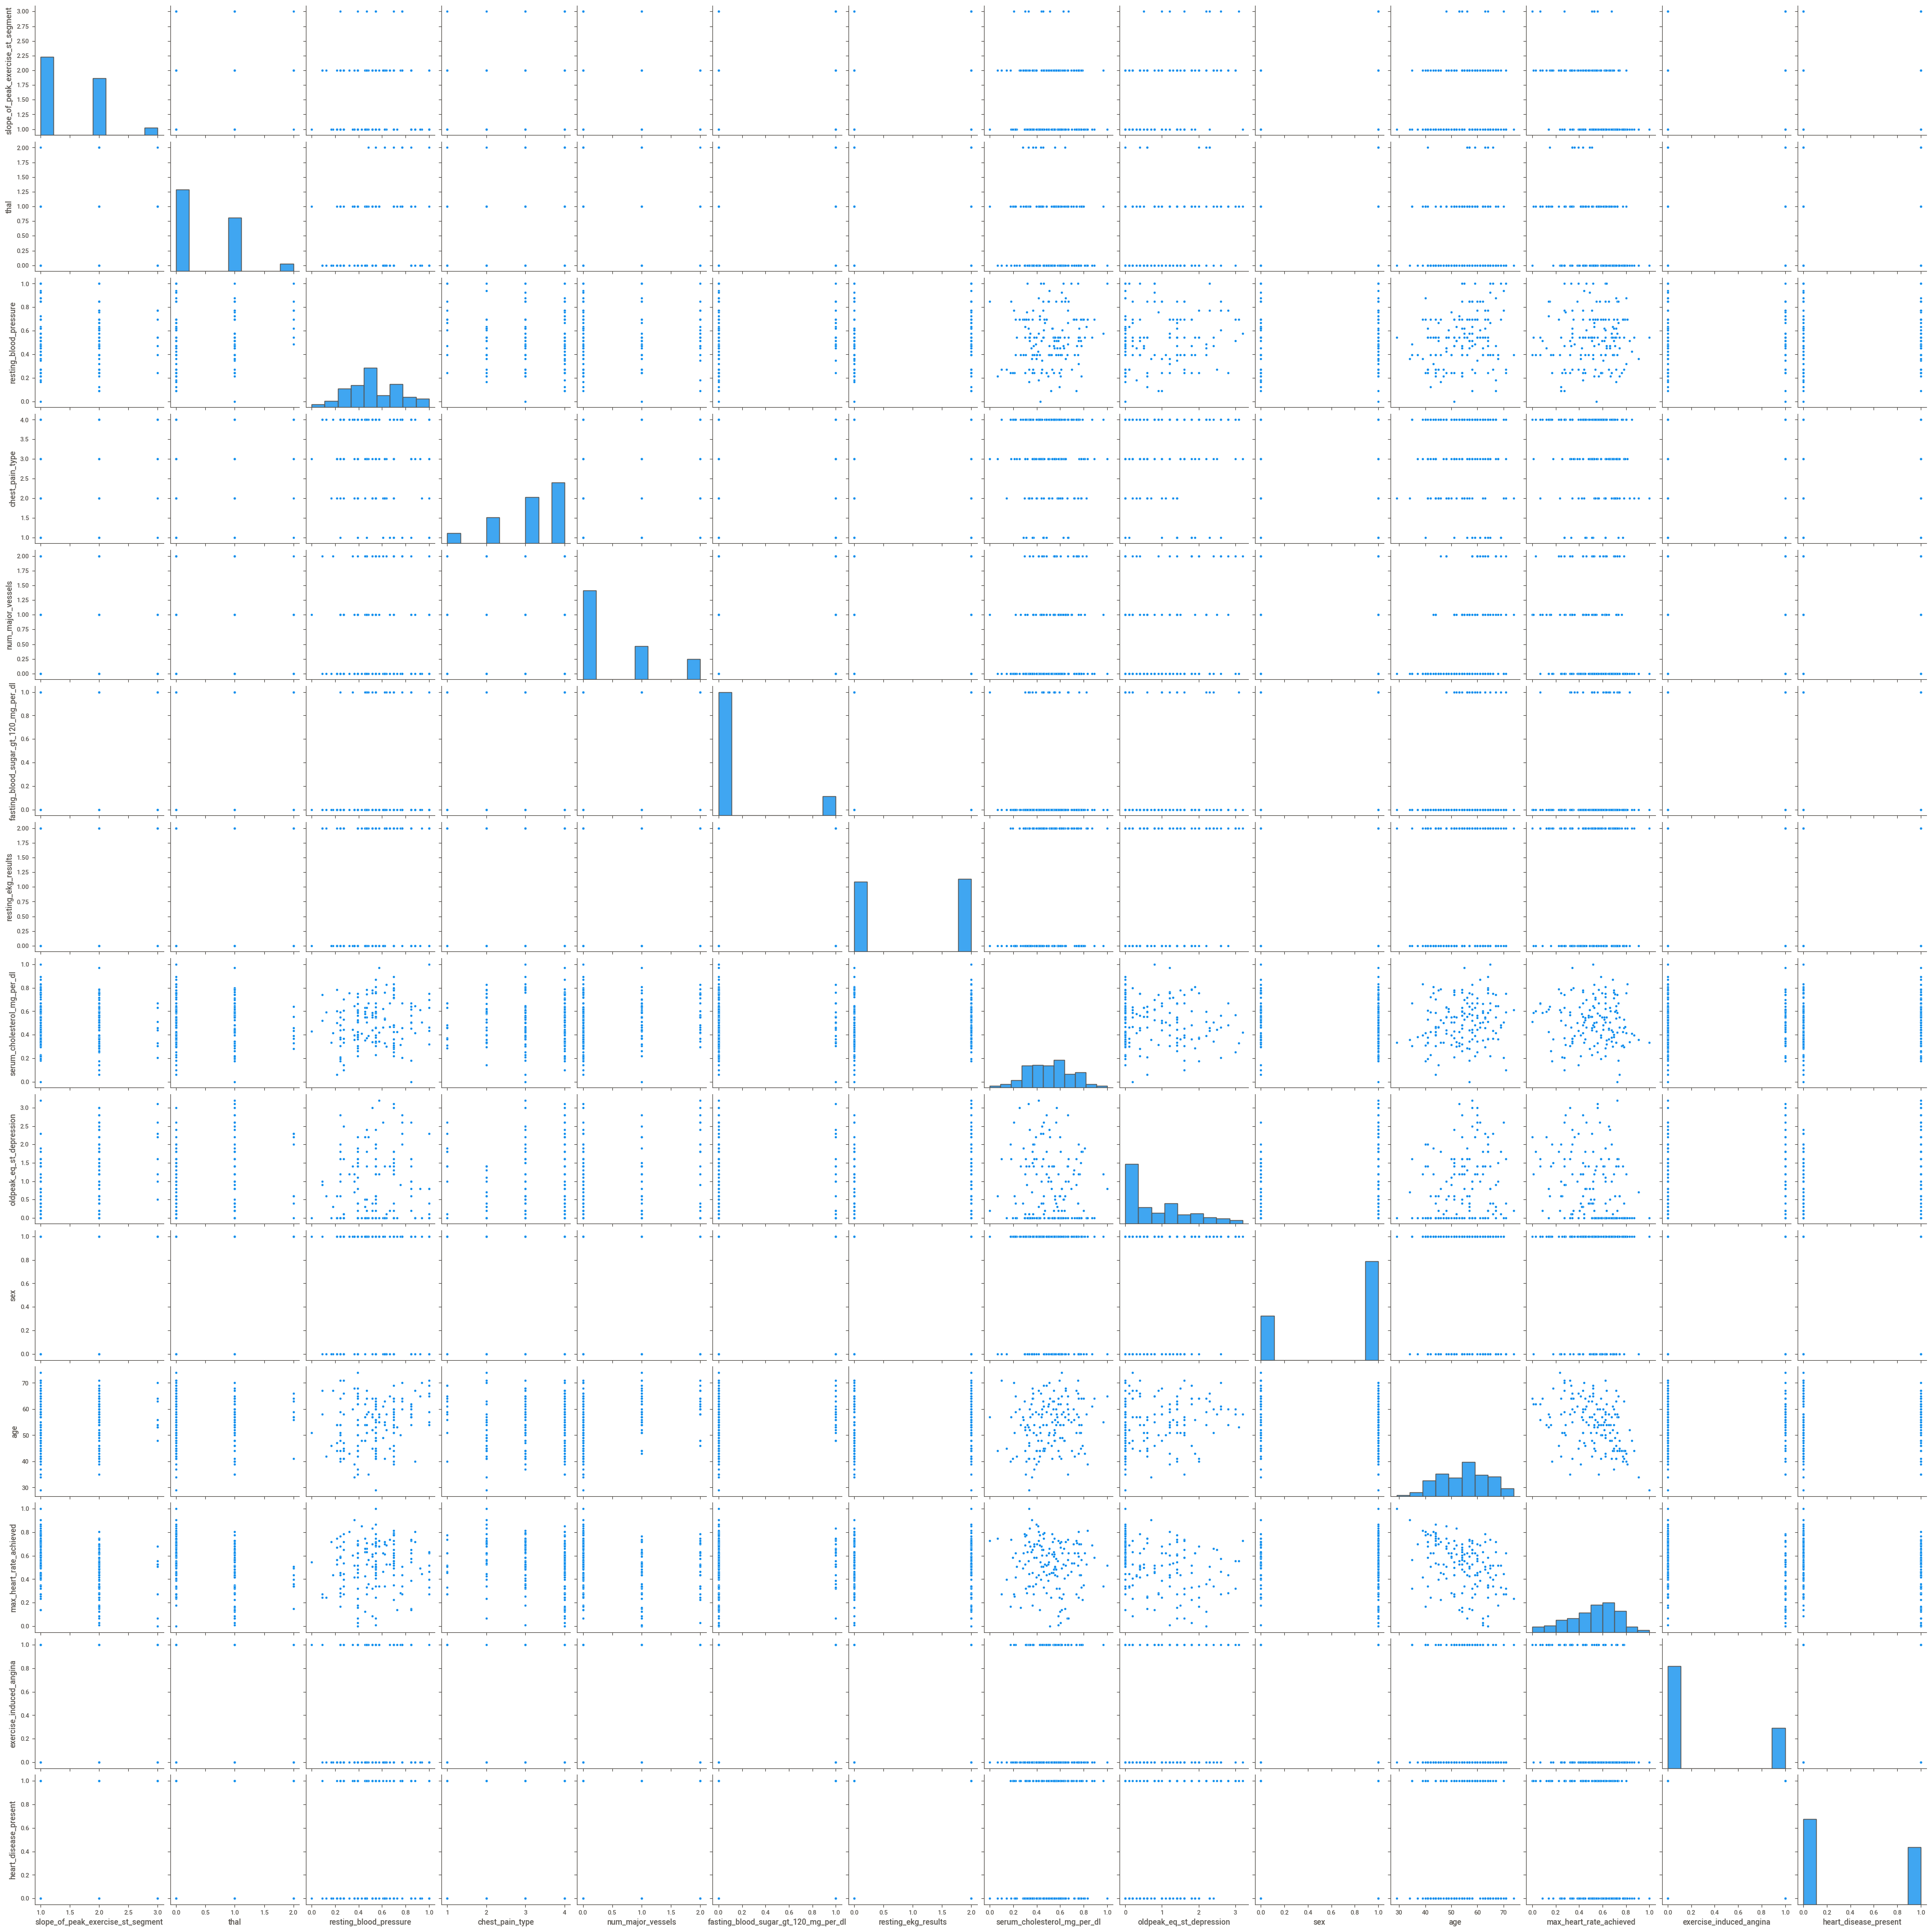

In [333]:
sns.pairplot(merge)
plt.show()

## Data preprocessing

##### Checking for Duplicate Data

In [189]:
merge.duplicated().sum()

0

**Observation:**
- No duplicate data

##### Checking Missing values

In [192]:
merge.isnull().sum()

patient_id                              0
slope_of_peak_exercise_st_segment       0
thal                                    0
resting_blood_pressure                  0
chest_pain_type                         0
num_major_vessels                       0
fasting_blood_sugar_gt_120_mg_per_dl    0
resting_ekg_results                     0
serum_cholesterol_mg_per_dl             0
oldpeak_eq_st_depression                0
sex                                     0
age                                     0
max_heart_rate_achieved                 0
exercise_induced_angina                 0
heart_disease_present                   0
dtype: int64

**Observation:**
- No missing values

##### Converting Categorical Data into Numerical Data

In [195]:
merge.thal.unique()

array(['normal', 'reversible_defect', 'fixed_defect'], dtype=object)

In [196]:
# Manual Encoding

merge.thal = merge.thal.map({'normal':0, 'reversible_defect':1, 'fixed_defect':2})

##### Droppint the Unwanted column 'patient_id'

In [198]:
merge = merge.drop(['patient_id'], axis = 1)

In [199]:
merge

,slope_of_peak_exercise_st_segment,thal,resting_blood_pressure,chest_pain_type,num_major_vessels,fasting_blood_sugar_gt_120_mg_per_dl,resting_ekg_results,serum_cholesterol_mg_per_dl,oldpeak_eq_st_depression,sex,age,max_heart_rate_achieved,exercise_induced_angina,heart_disease_present
0,1,0,128,2,0,0,2,308,0.0,1,45,170,0,0
1,2,0,110,3,0,0,0,214,1.6,0,54,158,0,0
2,1,0,125,4,3,0,2,304,0.0,1,77,162,1,1
3,1,1,152,4,0,0,0,223,0.0,1,40,181,0,1
4,3,1,178,1,0,0,2,270,4.2,1,59,145,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
175,2,1,125,4,2,1,0,254,0.2,1,67,163,0,1
176,2,0,180,4,0,0,1,327,3.4,0,55,117,1,1
177,2,1,125,3,0,0,0,309,1.8,1,64,131,1,1
178,1,0,124,3,2,1,0,255,0.0,1,48,175,0,0


##### Checking for Outliers

In [201]:
plotnum = 1 
plt.figure(figsize = (20, 25), facecolor = 'white')

for column in merge:
    plt.subplot(5, 3, plotnum)
    sns.boxplot(x = merge[column])
    
    plt.xlabel(column, fontsize = 20)
    plt.ylabel('Count', fontsize = 20)
    
    plotnum = plotnum + 1
plt.tight_layout()

**Observation:**
- Outliers are present in:
1. resting_blood_pressure
2. chest_pain_type
3. num_major_vessels
4. serum_cholesterol_mg_per_dl
5. oldpeak_eq_st_depression

##### Handling Outliers

In [204]:
# resting_blood_pressure

from scipy import stats

IQR = stats.iqr(merge.resting_blood_pressure, interpolation = 'midpoint')
Q1_rbp = merge.resting_blood_pressure.quantile(0.25)
Q3_rbp = merge.resting_blood_pressure.quantile(0.75)

lower_limit_rbp = Q1_rbp - 1.5 * IQR
upper_limit_rbp = Q3_rbp + 1.5 * IQR
lower_limit_rbp, upper_limit_rbp

merge = merge[(merge.resting_blood_pressure < upper_limit_rbp)]
merge

,slope_of_peak_exercise_st_segment,thal,resting_blood_pressure,chest_pain_type,num_major_vessels,fasting_blood_sugar_gt_120_mg_per_dl,resting_ekg_results,serum_cholesterol_mg_per_dl,oldpeak_eq_st_depression,sex,age,max_heart_rate_achieved,exercise_induced_angina,heart_disease_present
0,1,0,128,2,0,0,2,308,0.0,1,45,170,0,0
1,2,0,110,3,0,0,0,214,1.6,0,54,158,0,0
2,1,0,125,4,3,0,2,304,0.0,1,77,162,1,1
3,1,1,152,4,0,0,0,223,0.0,1,40,181,0,1
5,1,0,130,3,0,0,0,180,0.0,1,42,150,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
174,1,0,140,4,0,0,0,239,1.2,1,54,160,0,0
175,2,1,125,4,2,1,0,254,0.2,1,67,163,0,1
177,2,1,125,3,0,0,0,309,1.8,1,64,131,1,1
178,1,0,124,3,2,1,0,255,0.0,1,48,175,0,0


In [205]:
# Rechecking for Outliers

sns.boxplot(x = merge['resting_blood_pressure'])

<Axes: xlabel='heart_disease_present', ylabel='Count'>

In [206]:
# chest_pain_type

from scipy import stats

IQR = stats.iqr(merge.chest_pain_type, interpolation = 'midpoint')
Q1_rbp = merge.chest_pain_type.quantile(0.25)
Q3_rbp = merge.chest_pain_type.quantile(0.75)

lower_limit_rbp = Q1_rbp - 1.5 * IQR
upper_limit_rbp = Q3_rbp + 1.5 * IQR
lower_limit_rbp, upper_limit_rbp

merge = merge[(merge.chest_pain_type < upper_limit_rbp)]
merge

,slope_of_peak_exercise_st_segment,thal,resting_blood_pressure,chest_pain_type,num_major_vessels,fasting_blood_sugar_gt_120_mg_per_dl,resting_ekg_results,serum_cholesterol_mg_per_dl,oldpeak_eq_st_depression,sex,age,max_heart_rate_achieved,exercise_induced_angina,heart_disease_present
0,1,0,128,2,0,0,2,308,0.0,1,45,170,0,0
1,2,0,110,3,0,0,0,214,1.6,0,54,158,0,0
2,1,0,125,4,3,0,2,304,0.0,1,77,162,1,1
3,1,1,152,4,0,0,0,223,0.0,1,40,181,0,1
5,1,0,130,3,0,0,0,180,0.0,1,42,150,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
174,1,0,140,4,0,0,0,239,1.2,1,54,160,0,0
175,2,1,125,4,2,1,0,254,0.2,1,67,163,0,1
177,2,1,125,3,0,0,0,309,1.8,1,64,131,1,1
178,1,0,124,3,2,1,0,255,0.0,1,48,175,0,0


In [207]:
# Rechecking for Outliers

sns.boxplot(x = merge['chest_pain_type'])

<Axes: xlabel='heart_disease_present', ylabel='Count'>

In [208]:
# num_major_vessels

from scipy import stats

IQR = stats.iqr(merge.num_major_vessels, interpolation = 'midpoint')
Q1_rbp = merge.num_major_vessels.quantile(0.25)
Q3_rbp = merge.num_major_vessels.quantile(0.75)

lower_limit_rbp = Q1_rbp - 1.5 * IQR
upper_limit_rbp = Q3_rbp + 1.5 * IQR
lower_limit_rbp, upper_limit_rbp

merge = merge[(merge.num_major_vessels < upper_limit_rbp)]
merge

,slope_of_peak_exercise_st_segment,thal,resting_blood_pressure,chest_pain_type,num_major_vessels,fasting_blood_sugar_gt_120_mg_per_dl,resting_ekg_results,serum_cholesterol_mg_per_dl,oldpeak_eq_st_depression,sex,age,max_heart_rate_achieved,exercise_induced_angina,heart_disease_present
0,1,0,128,2,0,0,2,308,0.0,1,45,170,0,0
1,2,0,110,3,0,0,0,214,1.6,0,54,158,0,0
3,1,1,152,4,0,0,0,223,0.0,1,40,181,0,1
5,1,0,130,3,0,0,0,180,0.0,1,42,150,0,0
6,2,1,150,4,2,0,2,258,2.6,0,60,157,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
174,1,0,140,4,0,0,0,239,1.2,1,54,160,0,0
175,2,1,125,4,2,1,0,254,0.2,1,67,163,0,1
177,2,1,125,3,0,0,0,309,1.8,1,64,131,1,1
178,1,0,124,3,2,1,0,255,0.0,1,48,175,0,0


In [209]:
# Rechecking for Outliers

sns.boxplot(x = merge['num_major_vessels'])

<Axes: xlabel='heart_disease_present', ylabel='Count'>

In [210]:
# serum_cholesterol_mg_per_dl

from scipy import stats

IQR = stats.iqr(merge.serum_cholesterol_mg_per_dl, interpolation = 'midpoint')
Q1_rbp = merge.serum_cholesterol_mg_per_dl.quantile(0.25)
Q3_rbp = merge.serum_cholesterol_mg_per_dl.quantile(0.75)

lower_limit_rbp = Q1_rbp - 1.5 * IQR
upper_limit_rbp = Q3_rbp + 1.5 * IQR
lower_limit_rbp, upper_limit_rbp

merge = merge[(merge.serum_cholesterol_mg_per_dl < upper_limit_rbp)]
merge

,slope_of_peak_exercise_st_segment,thal,resting_blood_pressure,chest_pain_type,num_major_vessels,fasting_blood_sugar_gt_120_mg_per_dl,resting_ekg_results,serum_cholesterol_mg_per_dl,oldpeak_eq_st_depression,sex,age,max_heart_rate_achieved,exercise_induced_angina,heart_disease_present
0,1,0,128,2,0,0,2,308,0.0,1,45,170,0,0
1,2,0,110,3,0,0,0,214,1.6,0,54,158,0,0
3,1,1,152,4,0,0,0,223,0.0,1,40,181,0,1
5,1,0,130,3,0,0,0,180,0.0,1,42,150,0,0
6,2,1,150,4,2,0,2,258,2.6,0,60,157,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
174,1,0,140,4,0,0,0,239,1.2,1,54,160,0,0
175,2,1,125,4,2,1,0,254,0.2,1,67,163,0,1
177,2,1,125,3,0,0,0,309,1.8,1,64,131,1,1
178,1,0,124,3,2,1,0,255,0.0,1,48,175,0,0


In [211]:
# Rechecking for Outliers

sns.boxplot(x = merge['serum_cholesterol_mg_per_dl'])

<Axes: xlabel='heart_disease_present', ylabel='Count'>

In [212]:
# oldpeak_eq_st_depression

from scipy import stats

IQR = stats.iqr(merge.oldpeak_eq_st_depression, interpolation = 'midpoint')
Q1_rbp = merge.oldpeak_eq_st_depression.quantile(0.25)
Q3_rbp = merge.oldpeak_eq_st_depression.quantile(0.75)

lower_limit_rbp = Q1_rbp - 1.5 * IQR
upper_limit_rbp = Q3_rbp + 1.5 * IQR
lower_limit_rbp, upper_limit_rbp

merge = merge[(merge.oldpeak_eq_st_depression < upper_limit_rbp)]
merge

,slope_of_peak_exercise_st_segment,thal,resting_blood_pressure,chest_pain_type,num_major_vessels,fasting_blood_sugar_gt_120_mg_per_dl,resting_ekg_results,serum_cholesterol_mg_per_dl,oldpeak_eq_st_depression,sex,age,max_heart_rate_achieved,exercise_induced_angina,heart_disease_present
0,1,0,128,2,0,0,2,308,0.0,1,45,170,0,0
1,2,0,110,3,0,0,0,214,1.6,0,54,158,0,0
3,1,1,152,4,0,0,0,223,0.0,1,40,181,0,1
5,1,0,130,3,0,0,0,180,0.0,1,42,150,0,0
6,2,1,150,4,2,0,2,258,2.6,0,60,157,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
174,1,0,140,4,0,0,0,239,1.2,1,54,160,0,0
175,2,1,125,4,2,1,0,254,0.2,1,67,163,0,1
177,2,1,125,3,0,0,0,309,1.8,1,64,131,1,1
178,1,0,124,3,2,1,0,255,0.0,1,48,175,0,0


In [213]:
# Rechecking for Outliers

sns.boxplot(x = merge['oldpeak_eq_st_depression'])

<Axes: xlabel='heart_disease_present', ylabel='Count'>

### Feature Engineering

In [215]:
merge.corr()

,slope_of_peak_exercise_st_segment,thal,resting_blood_pressure,chest_pain_type,num_major_vessels,fasting_blood_sugar_gt_120_mg_per_dl,resting_ekg_results,serum_cholesterol_mg_per_dl,oldpeak_eq_st_depression,sex,age,max_heart_rate_achieved,exercise_induced_angina,heart_disease_present
slope_of_peak_exercise_st_segment,1.000000,0.288090,-0.043740,0.126718,0.070468,0.140586,0.179044,-0.077734,0.548697,0.121027,0.172074,-0.415654,0.213271,0.305789
thal,0.288090,1.000000,0.125418,0.293743,0.205317,0.062664,0.006169,-0.055325,0.300157,0.444434,0.096512,-0.326985,0.337153,0.496705
resting_blood_pressure,-0.043740,0.125418,1.000000,-0.111252,0.049465,0.141173,0.077664,0.145349,0.090124,0.003638,0.251216,0.058401,0.008319,0.012149
chest_pain_type,0.126718,0.293743,-0.111252,1.000000,0.157653,-0.144066,0.025390,0.032086,0.086931,0.133225,0.018185,-0.254775,0.342630,0.401578
num_major_vessels,0.070468,0.205317,0.049465,0.157653,1.000000,0.133194,0.039324,0.184991,0.247005,0.072094,0.396893,-0.210941,0.181983,0.396619
fasting_blood_sugar_gt_120_mg_per_dl,0.140586,0.062664,0.141173,-0.144066,0.133194,1.000000,0.086610,-0.015082,0.017945,0.102060,0.162476,0.049686,0.001618,0.023088
resting_ekg_results,0.179044,0.006169,0.077664,0.025390,0.039324,0.086610,1.000000,0.137178,0.128564,0.040878,0.073013,-0.096207,0.045059,0.142255
serum_cholesterol_mg_per_dl,-0.077734,-0.055325,0.145349,0.032086,0.184991,-0.015082,0.137178,1.000000,-0.076060,-0.107560,0.161908,-0.075778,0.044722,0.137732
oldpeak_eq_st_depression,0.548697,0.300157,0.090124,0.086931,0.247005,0.017945,0.128564,-0.076060,1.000000,0.148313,0.236969,-0.324356,0.242071,0.350555
sex,0.121027,0.444434,0.003638,0.133225,0.072094,0.102060,0.040878,-0.107560,0.148313,1.000000,-0.119729,-0.067184,0.266951,0.375972


In [216]:
plt.figure(figsize = (15,15))
sns.heatmap(merge.corr(), annot = True)

<Axes: >

**Observation**
- No highly correlated data

##### Scaling of Data Set

In [219]:
merge

,slope_of_peak_exercise_st_segment,thal,resting_blood_pressure,chest_pain_type,num_major_vessels,fasting_blood_sugar_gt_120_mg_per_dl,resting_ekg_results,serum_cholesterol_mg_per_dl,oldpeak_eq_st_depression,sex,age,max_heart_rate_achieved,exercise_induced_angina,heart_disease_present
0,1,0,128,2,0,0,2,308,0.0,1,45,170,0,0
1,2,0,110,3,0,0,0,214,1.6,0,54,158,0,0
3,1,1,152,4,0,0,0,223,0.0,1,40,181,0,1
5,1,0,130,3,0,0,0,180,0.0,1,42,150,0,0
6,2,1,150,4,2,0,2,258,2.6,0,60,157,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
174,1,0,140,4,0,0,0,239,1.2,1,54,160,0,0
175,2,1,125,4,2,1,0,254,0.2,1,67,163,0,1
177,2,1,125,3,0,0,0,309,1.8,1,64,131,1,1
178,1,0,124,3,2,1,0,255,0.0,1,48,175,0,0


In [220]:
merge.columns

Index(['slope_of_peak_exercise_st_segment', 'thal', 'resting_blood_pressure',
       'chest_pain_type', 'num_major_vessels',
       'fasting_blood_sugar_gt_120_mg_per_dl', 'resting_ekg_results',
       'serum_cholesterol_mg_per_dl', 'oldpeak_eq_st_depression', 'sex', 'age',
       'max_heart_rate_achieved', 'exercise_induced_angina',
       'heart_disease_present'],
      dtype='object')

##### MinMax Scalar

In [222]:
from sklearn.preprocessing import MinMaxScaler
 
scale = MinMaxScaler()
merge[['resting_blood_pressure', 'serum_cholesterol_mg_per_dl', 'max_heart_rate_achieved']] = scale.fit_transform(merge[['resting_blood_pressure', 'serum_cholesterol_mg_per_dl', 'max_heart_rate_achieved']])

In [223]:
merge

,slope_of_peak_exercise_st_segment,thal,resting_blood_pressure,chest_pain_type,num_major_vessels,fasting_blood_sugar_gt_120_mg_per_dl,resting_ekg_results,serum_cholesterol_mg_per_dl,oldpeak_eq_st_depression,sex,age,max_heart_rate_achieved,exercise_induced_angina,heart_disease_present
0,1,0,0.515152,2,0,0,2,0.777778,0.0,1,45,0.698113,0,0
1,2,0,0.242424,3,0,0,0,0.376068,1.6,0,54,0.584906,0,0
3,1,1,0.878788,4,0,0,0,0.414530,0.0,1,40,0.801887,0,1
5,1,0,0.545455,3,0,0,0,0.230769,0.0,1,42,0.509434,0,0
6,2,1,0.848485,4,2,0,2,0.564103,2.6,0,60,0.575472,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
174,1,0,0.696970,4,0,0,0,0.482906,1.2,1,54,0.603774,0,0
175,2,1,0.469697,4,2,1,0,0.547009,0.2,1,67,0.632075,0,1
177,2,1,0.469697,3,0,0,0,0.782051,1.8,1,64,0.330189,1,1
178,1,0,0.454545,3,2,1,0,0.551282,0.0,1,48,0.745283,0,0


### Model Creation

##### Creating Training And Testing Data

In [226]:
X = merge[['slope_of_peak_exercise_st_segment','thal', 'resting_blood_pressure',
       'chest_pain_type','num_major_vessels',
       'fasting_blood_sugar_gt_120_mg_per_dl','resting_ekg_results',
       'serum_cholesterol_mg_per_dl','oldpeak_eq_st_depression','sex','age',
       'max_heart_rate_achieved','exercise_induced_angina']]

y = merge[['heart_disease_present']]

In [227]:
X

,slope_of_peak_exercise_st_segment,thal,resting_blood_pressure,chest_pain_type,num_major_vessels,fasting_blood_sugar_gt_120_mg_per_dl,resting_ekg_results,serum_cholesterol_mg_per_dl,oldpeak_eq_st_depression,sex,age,max_heart_rate_achieved,exercise_induced_angina
0,1,0,0.515152,2,0,0,2,0.777778,0.0,1,45,0.698113,0
1,2,0,0.242424,3,0,0,0,0.376068,1.6,0,54,0.584906,0
3,1,1,0.878788,4,0,0,0,0.414530,0.0,1,40,0.801887,0
5,1,0,0.545455,3,0,0,0,0.230769,0.0,1,42,0.509434,0
6,2,1,0.848485,4,2,0,2,0.564103,2.6,0,60,0.575472,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
174,1,0,0.696970,4,0,0,0,0.482906,1.2,1,54,0.603774,0
175,2,1,0.469697,4,2,1,0,0.547009,0.2,1,67,0.632075,0
177,2,1,0.469697,3,0,0,0,0.782051,1.8,1,64,0.330189,1
178,1,0,0.454545,3,2,1,0,0.551282,0.0,1,48,0.745283,0


In [228]:
y

,heart_disease_present
0,0
1,0
3,1
5,0
6,1
...,...
174,0
175,1
177,1
178,0


In [229]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 40)

In [230]:
X_train.shape

(124, 13)

In [231]:
y_train.shape

(124, 1)

In [232]:
X_test.shape

(31, 13)

In [233]:
y_test.shape

(31, 1)

In [234]:
y_test

,heart_disease_present
145,0
91,1
28,1
126,0
149,1
159,1
42,0
15,1
152,1
63,0


#### 1. LOGISTIC REGRESSION ALOGORITHM

In [236]:
from sklearn.linear_model import LogisticRegression

lr = LogisticRegression()

lr.fit(X_train, y_train)

LogisticRegression()

In [237]:
y_pred_LR = lr.predict(X_test)

In [238]:
y_pred_LR

array([0, 1, 0, 0, 1, 1, 0, 1, 1, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 1, 1, 1, 1, 1, 0], dtype=int64)

##### Model Evaluation for Logistic Regression Algorithm

In [240]:
from sklearn.metrics import confusion_matrix, accuracy_score, recall_score, precision_score, f1_score, classification_report

In [241]:
# Confusion Matrix
cm_LR = confusion_matrix(y_test, y_pred_LR)

# Accuracy Score
acc_LR = accuracy_score(y_test, y_pred_LR)

# Recall
recall_LR = recall_score(y_test, y_pred_LR)

# Precision
precision_LR = precision_score(y_test, y_pred_LR)

# f1 Score
f1_LR = f1_score(y_test, y_pred_LR)

# Classification Report
cr_LR = classification_report(y_test, y_pred_LR)

In [242]:
print(cm_LR)
print(acc_LR)
print(recall_LR)
print(precision_LR)
print(f1_LR)
print(cr_LR)

[[15  2]
 [ 4 10]]
0.8064516129032258
0.7142857142857143
0.8333333333333334
0.7692307692307693
              precision    recall  f1-score   support

           0       0.79      0.88      0.83        17
           1       0.83      0.71      0.77        14

    accuracy                           0.81        31
   macro avg       0.81      0.80      0.80        31
weighted avg       0.81      0.81      0.80        31



#### 2. SUPPORT VECTOR MACHINE ALGORITHM

In [244]:
from sklearn.svm import SVC

svclassifier = SVC(kernel = 'rbf', C = 30, gamma = 'auto') 
svclassifier.fit(X_train, y_train)

SVC(C=30, gamma='auto')

In [245]:
y_predSVM = svclassifier.predict(X_test)

In [246]:
y_predSVM

array([1, 1, 1, 0, 1, 1, 0, 1, 1, 0, 0, 1, 0, 0, 1, 0, 1, 1, 0, 0, 1, 0,
       0, 0, 0, 1, 0, 1, 1, 1, 0], dtype=int64)

##### Model Evaluation for SVM

In [248]:
from sklearn.metrics import confusion_matrix, accuracy_score, recall_score, precision_score, f1_score, classification_report

In [249]:
# Confusion Matrix
cm_SVM = confusion_matrix(y_test, y_predSVM)

# Accuracy Score
acc_SVM = accuracy_score(y_test, y_predSVM)

# Recall
recall_SVM = recall_score(y_test, y_predSVM)

# Precision
precision_SVM = precision_score(y_test, y_predSVM)

# f1 Score
f1_SVM = f1_score(y_test, y_predSVM)

# Classification Report
cr_SVM = classification_report(y_test, y_predSVM)

In [250]:
print(cm_SVM)
print(acc_SVM)
print(recall_SVM)
print(precision_SVM)
print(f1_SVM)
print(cr_SVM)

[[14  3]
 [ 1 13]]
0.8709677419354839
0.9285714285714286
0.8125
0.8666666666666667
              precision    recall  f1-score   support

           0       0.93      0.82      0.88        17
           1       0.81      0.93      0.87        14

    accuracy                           0.87        31
   macro avg       0.87      0.88      0.87        31
weighted avg       0.88      0.87      0.87        31



#### 3. NAIVE-BAYES ALGORITHM

In [252]:
from sklearn.naive_bayes import GaussianNB

gnb = GaussianNB()
gnb.fit(X_train, y_train)

GaussianNB()

In [253]:
y_pred_NB = gnb.predict(X_test)

In [254]:
y_pred_NB

array([0, 1, 1, 0, 1, 1, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0,
       0, 1, 0, 1, 1, 1, 1, 1, 0], dtype=int64)

##### Model Evaluation for Naive-Bayes Algorithm 

In [256]:
from sklearn.metrics import confusion_matrix, accuracy_score, recall_score, precision_score, f1_score, classification_report

In [257]:
# Confusion Matrix
cm_NB = confusion_matrix(y_test, y_pred_NB)

# Accuracy Score
acc_NB = accuracy_score(y_test, y_pred_NB)

# Recall
recall_NB = recall_score(y_test, y_pred_NB)

# Precision
precision_NB = precision_score(y_test, y_pred_NB)

# f1 Score
f1_NB = f1_score(y_test, y_pred_NB)

# Classification Report
cr_NB = classification_report(y_test, y_pred_NB)

In [258]:
print(cm_NB)
print(acc_NB)
print(recall_NB)
print(precision_NB)
print(f1_NB)
print(cr_NB)

[[14  3]
 [ 4 10]]
0.7741935483870968
0.7142857142857143
0.7692307692307693
0.7407407407407407
              precision    recall  f1-score   support

           0       0.78      0.82      0.80        17
           1       0.77      0.71      0.74        14

    accuracy                           0.77        31
   macro avg       0.77      0.77      0.77        31
weighted avg       0.77      0.77      0.77        31



#### 4. XGBOOST ALGORITHM

In [260]:
from xgboost import XGBClassifier

xgb_r = XGBClassifier()
xgb_r.fit(X_train, y_train)

y_pred_XGB = xgb_r.predict(X_test)

In [261]:
y_pred_XGB

array([0, 1, 0, 0, 0, 1, 0, 1, 1, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0,
       0, 0, 0, 1, 1, 1, 1, 1, 0])

##### Model Evaluation for XGBoost Algorithm

In [263]:
from sklearn.metrics import confusion_matrix, accuracy_score, recall_score, precision_score, f1_score, classification_report

In [264]:
# Confusion Matrix
cm_XGB = confusion_matrix(y_test, y_pred_XGB)

# Accuracy Score
acc_XGB = accuracy_score(y_test, y_pred_XGB)

# Recall
recall_XGB = recall_score(y_test, y_pred_XGB)

# Precision
precision_XGB = precision_score(y_test, y_pred_XGB)

# f1 Score
f1_XGB = f1_score(y_test, y_pred_XGB)

# Classification Report
cr_XGB = classification_report(y_test, y_pred_XGB)

In [265]:
print(cm_XGB)
print(acc_XGB)
print(recall_XGB)
print(precision_XGB)
print(f1_XGB)
print(cr_XGB)

[[15  2]
 [ 4 10]]
0.8064516129032258
0.7142857142857143
0.8333333333333334
0.7692307692307693
              precision    recall  f1-score   support

           0       0.79      0.88      0.83        17
           1       0.83      0.71      0.77        14

    accuracy                           0.81        31
   macro avg       0.81      0.80      0.80        31
weighted avg       0.81      0.81      0.80        31



#### 5. DECISION TREE ALGORITHM

In [267]:
# from sklearn.tree import DecisionTreeClassifier  

# DT = DecisionTreeClassifier(max_depth = 5, criterion = 'entropy') 

# DT.fit(X, y)

In [268]:
from sklearn.tree import DecisionTreeClassifier

DT = DecisionTreeClassifier(max_depth = 5, criterion = 'entropy')

m = DT.fit(X, y)

In [269]:
y_pred_DT = m.predict(X_test)
y_pred_DT

array([0, 0, 1, 0, 1, 1, 0, 1, 1, 0, 0, 1, 0, 0, 1, 0, 1, 0, 0, 0, 1, 0,
       0, 0, 0, 1, 0, 0, 1, 1, 0], dtype=int64)

##### Model Evaluation for Decision Tree Algorithm

In [271]:
from sklearn.metrics import confusion_matrix, accuracy_score, recall_score, precision_score, f1_score, classification_report

In [272]:
# Confusion Matrix
cm_DT = confusion_matrix(y_test, y_pred_DT)

# Accuracy Score
acc_DT = accuracy_score(y_test, y_pred_DT)

# Recall
recall_DT = recall_score(y_test, y_pred_DT)

# Precision
precision_DT = precision_score(y_test, y_pred_DT)

# f1 Score
f1_DT = f1_score(y_test, y_pred_DT)

# Classification Report
cr_DT = classification_report(y_test, y_pred_DT)

In [273]:
print(cm_DT)
print(acc_DT)
print(recall_DT)
print(precision_DT)
print(f1_DT)
print(cr_DT)

[[17  0]
 [ 2 12]]
0.9354838709677419
0.8571428571428571
1.0
0.9230769230769231
              precision    recall  f1-score   support

           0       0.89      1.00      0.94        17
           1       1.00      0.86      0.92        14

    accuracy                           0.94        31
   macro avg       0.95      0.93      0.93        31
weighted avg       0.94      0.94      0.93        31



##### Hyperparameter Tuning 

In [275]:
from sklearn.model_selection import GridSearchCV

In [276]:
params_DT = {
    "criterion" : ("gini", "entropy"),        
    "splitter" : ("best", "random"),         
    "max_depth" : (list(range(1, 20))),      
    "min_samples_split" : [2, 3, 4],         
    "min_samples_leaf" : list(range(1, 20)),   
}

clf_DT = DecisionTreeClassifier(random_state = 3)    
cv_DT = GridSearchCV(clf_DT, params_DT, scoring = "f1", n_jobs =- 1, verbose = 5, cv = 3)

In [277]:
cv_DT.fit(X_train, y_train)         
best_params_DT = cv_DT.best_params_        
print(f"Best paramters: {best_params_DT})") 

Fitting 3 folds for each of 4332 candidates, totalling 12996 fits
Best paramters: {'criterion': 'gini', 'max_depth': 4, 'min_samples_leaf': 7, 'min_samples_split': 2, 'splitter': 'random'})


In [278]:
Bestparamters: ({'criterion': 'gini', 'max_depth': 1, 'min_samples_leaf': 1, 'min_samples_split': 2, 'splitter': 'best'})

In [279]:
cv_DT.best_params_

{'criterion': 'gini',
 'max_depth': 4,
 'min_samples_leaf': 7,
 'min_samples_split': 2,
 'splitter': 'random'}

In [280]:
cv_DT.best_score_

0.7228195937873357

In [281]:
# Passing best parameter to decision tree

new_DT = DecisionTreeClassifier( criterion = 'gini', max_depth = 1, min_samples_leaf = 1, min_samples_split = 2, splitter = 'best')

In [282]:
new_DT.fit(X_train, y_train)

DecisionTreeClassifier(max_depth=1)

In [283]:
new_y_pred_DT = new_DT.predict(X_test)
new_y_pred_DT

array([0, 0, 0, 0, 1, 1, 0, 1, 1, 0, 0, 1, 0, 0, 1, 0, 1, 0, 0, 0, 1, 0,
       0, 0, 0, 1, 1, 0, 1, 1, 0], dtype=int64)

##### Model Evaluation for New Decision Tree Algorithm after Hyperparameter tuning

In [285]:
# Confusion Matrix
new_cm_DT = confusion_matrix(y_test, new_y_pred_DT)

# Accuracy Score
new_acc_DT = accuracy_score(y_test, new_y_pred_DT)

# Recall
new_recall_DT = recall_score(y_test, new_y_pred_DT)

# Precision
new_precision_DT = precision_score(y_test, new_y_pred_DT)

# f1 Score
new_f1_DT = f1_score(y_test, new_y_pred_DT)

# Classification Report
new_cr_DT = classification_report(y_test, new_y_pred_DT)

In [286]:
print(new_cm_DT)
print(new_acc_DT)
print(new_recall_DT)
print(new_precision_DT)
print(new_f1_DT)
print(new_cr_DT)

[[16  1]
 [ 3 11]]
0.8709677419354839
0.7857142857142857
0.9166666666666666
0.8461538461538461
              precision    recall  f1-score   support

           0       0.84      0.94      0.89        17
           1       0.92      0.79      0.85        14

    accuracy                           0.87        31
   macro avg       0.88      0.86      0.87        31
weighted avg       0.88      0.87      0.87        31



#### 6. RANDOM FOREST ALGORITHM

In [288]:
from sklearn.ensemble import RandomForestClassifier   

RF = RandomForestClassifier(n_estimators = 100)   

RF.fit(X_train, y_train)

RandomForestClassifier()

In [289]:
y_pred_RF = RF.predict(X_test)
y_pred_RF

array([0, 1, 0, 0, 0, 1, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 1, 0, 1, 1, 1, 0], dtype=int64)

##### Model Evaluation for Random Forest

In [291]:
# Confusion Matrix
cm_RF = confusion_matrix(y_test, y_pred_RF)

# Accuracy Score
acc_RF = accuracy_score(y_test, y_pred_RF)

# Recall
recall_RF = recall_score(y_test, y_pred_RF)

# Precision
precision_RF = precision_score(y_test, y_pred_RF)

# f1 Score
f1_RF = f1_score(y_test, y_pred_RF)

# Classification Report
cr_RF = classification_report(y_test, y_pred_RF)

In [292]:
print(cm_RF)
print(acc_RF)
print(recall_RF)
print(precision_RF)
print(f1_RF)
print(cr_RF)

[[16  1]
 [ 6  8]]
0.7741935483870968
0.5714285714285714
0.8888888888888888
0.6956521739130435
              precision    recall  f1-score   support

           0       0.73      0.94      0.82        17
           1       0.89      0.57      0.70        14

    accuracy                           0.77        31
   macro avg       0.81      0.76      0.76        31
weighted avg       0.80      0.77      0.76        31



##### Hyperparameter Tuning 

In [294]:
from sklearn.model_selection import RandomizedSearchCV

n_estimators = [int(x) for x in np.linspace(start = 200, stop = 2000, num = 10)] 

max_features = ['auto', 'sqrt']
max_depth = [int(x) for x in np.linspace(10, 110, num = 11)] 
max_depth.append(None)
min_samples_split = [2, 5, 10] 
min_samples_leaf = [1, 2, 4]
bootstrap = [True, False]

In [295]:
random_grid = {'n_estimators': n_estimators, 'max_features': max_features,
               'max_depth': max_depth, 'min_samples_split': min_samples_split,
               'min_samples_leaf': min_samples_leaf, 'bootstrap': bootstrap}

clf_RF = RandomForestClassifier(random_state = 42) 

cv_RF = RandomizedSearchCV(estimator = clf_RF, scoring = 'f1', param_distributions = random_grid, n_iter = 100, cv = 3, 
        verbose = 2, random_state = 42, n_jobs = -1)

In [296]:
cv_RF.fit(X_train, y_train) 

best_params_RF = cv_RF.best_params_ 
print(f"Best paramters: {best_params_RF})") 

Fitting 3 folds for each of 100 candidates, totalling 300 fits
Best paramters: {'n_estimators': 600, 'min_samples_split': 2, 'min_samples_leaf': 4, 'max_features': 'sqrt', 'max_depth': 60, 'bootstrap': False})


In [297]:
clf_RF = RandomForestClassifier(n_estimators = 600, min_samples_split = 2, min_samples_leaf = 4, max_features = 'sqrt', max_depth = 60, bootstrap = False) 
clf_RF.fit(X_train, y_train) 

RandomForestClassifier(bootstrap=False, max_depth=60, min_samples_leaf=4,
                       n_estimators=600)

In [298]:
new_y_pred_RF = clf_RF.predict(X_test)
new_y_pred_RF

array([0, 1, 0, 0, 0, 1, 0, 1, 1, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 1, 1, 0, 1, 1, 0], dtype=int64)

##### Model Evaluation for New Random Forest Algorithm after Hyperparameter tuning

In [300]:
# Confusion Matrix
new_cm_RF = confusion_matrix(y_test, new_y_pred_RF)

# Accuracy Score
new_acc_RF = accuracy_score(y_test, new_y_pred_RF)

# Recall
new_recall_RF = recall_score(y_test, new_y_pred_RF)

# Precision
new_precision_RF = precision_score(y_test, new_y_pred_RF)

# f1 Score
new_f1_RF = f1_score(y_test, new_y_pred_RF)

# Classification Report
new_cr_RF = classification_report(y_test, new_y_pred_RF)

In [301]:
print(new_cm_RF)
print(new_acc_RF)
print(new_recall_RF)
print(new_precision_RF)
print(new_f1_RF)
print(new_cr_RF)

[[16  1]
 [ 5  9]]
0.8064516129032258
0.6428571428571429
0.9
0.75
              precision    recall  f1-score   support

           0       0.76      0.94      0.84        17
           1       0.90      0.64      0.75        14

    accuracy                           0.81        31
   macro avg       0.83      0.79      0.80        31
weighted avg       0.82      0.81      0.80        31



#### 7. K-NEAREST NEIGHBOURS ALGORITHM (K-NN)

In [303]:
from sklearn.neighbors import KNeighborsClassifier

model = KNeighborsClassifier(n_neighbors = 12)
model.fit(X_train, y_train)

KNeighborsClassifier(n_neighbors=12)

In [304]:
y_pred_KNN = model.predict(X_test)
y_pred_KNN

array([0, 0, 1, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 1, 0], dtype=int64)

##### Model Evaluation for K-NN

In [306]:
# Confusion Matrix
cm_KNN = confusion_matrix(y_test, y_pred_KNN)

# Accuracy Score
acc_KNN = accuracy_score(y_test, y_pred_KNN)

# Recall
recall_KNN = recall_score(y_test, y_pred_KNN)

# Precision
precision_KNN = precision_score(y_test, y_pred_KNN)

# f1 Score
f1_KNN = f1_score(y_test, y_pred_KNN)

# Classification Report
cr_KNN = classification_report(y_test, y_pred_KNN)

In [307]:
print(cm_KNN)
print(acc_KNN)
print(recall_KNN)
print(precision_KNN)
print(f1_KNN)
print(cr_KNN)

[[17  0]
 [ 7  7]]
0.7741935483870968
0.5
1.0
0.6666666666666666
              precision    recall  f1-score   support

           0       0.71      1.00      0.83        17
           1       1.00      0.50      0.67        14

    accuracy                           0.77        31
   macro avg       0.85      0.75      0.75        31
weighted avg       0.84      0.77      0.76        31



### Displaying the Accuracy Score for the Algorithms

In [321]:
scores = [acc_LR, acc_SVM, acc_NB, acc_XGB, acc_DT, new_acc_DT, acc_RF, new_acc_RF, acc_KNN]
algorithms = ["Logistic Regression","Support Vector Machine","Naive Bayes","XGBoost","Decision Tree","Decision Tree_HT","Random Forest","Random Forest_HT"]    

for i in range(len(algorithms)): 
    print("The accuracy score achieved using "+algorithms[i]+" is: "+str(scores[i])+" %")


The accuracy score achieved using Logistic Regression is: 0.8064516129032258 %
The accuracy score achieved using Support Vector Machine is: 0.8709677419354839 %
The accuracy score achieved using Naive Bayes is: 0.7741935483870968 %
The accuracy score achieved using XGBoost is: 0.8064516129032258 %
The accuracy score achieved using Decision Tree is: 0.9354838709677419 %
The accuracy score achieved using Decision Tree_HT is: 0.8709677419354839 %
The accuracy score achieved using Random Forest is: 0.7741935483870968 %
The accuracy score achieved using Random Forest_HT is: 0.8064516129032258 %


### Displaying the f1 Score for the Algorithms

In [323]:
scores = [f1_LR, f1_SVM, f1_NB, f1_XGB, f1_DT, new_f1_DT, f1_RF, new_f1_RF, f1_KNN]
algorithms = ["Logistic Regression","Support Vector Machine","Naive Bayes","XGBoost","Decision Tree","Decision Tree_HT","Random Forest","Random Forest_HT","K-Nearest Neighbors"]    

for i in range(len(algorithms)): 
    print("The f1 score achieved using "+algorithms[i]+" is: "+str(scores[i])+" %")

The f1 score achieved using Logistic Regression is: 0.7692307692307693 %
The f1 score achieved using Support Vector Machine is: 0.8666666666666667 %
The f1 score achieved using Naive Bayes is: 0.7407407407407407 %
The f1 score achieved using XGBoost is: 0.7692307692307693 %
The f1 score achieved using Decision Tree is: 0.9230769230769231 %
The f1 score achieved using Decision Tree_HT is: 0.8461538461538461 %
The f1 score achieved using Random Forest is: 0.6956521739130435 %
The f1 score achieved using Random Forest_HT is: 0.75 %
The f1 score achieved using K-Nearest Neighbors is: 0.6666666666666666 %


### Tabulate the Results for all the Algorithms

In [325]:
!pip install tabulate

In [338]:
from tabulate import tabulate

In [340]:
data = [["LR", acc_LR, recall_LR, precision_LR, f1_LR], 
        ["SVM", acc_SVM, recall_SVM, precision_SVM, f1_SVM],
        ["Naive-Bayes", acc_NB, recall_NB, precision_NB, f1_NB],
        ["XGBoost", acc_XGB, recall_XGB, precision_XGB, f1_XGB],
        ["Decision Tree", acc_DT, recall_DT, precision_DT, f1_DT],
        ["Decision Tree_HT", new_acc_DT, new_recall_DT, new_precision_DT, new_f1_DT],
        ["Random Forest", acc_RF, recall_RF, precision_RF, f1_RF],
        ["Random Forest_HT", new_acc_RF, new_recall_RF, new_precision_RF, new_f1_RF],
         ["K-NN", acc_KNN, recall_KNN, precision_KNN, f1_KNN]]

col_names = ["Algorithm", "Accuracy Score", "Recall Score", "Precision Score", "F1 Score"]

print(tabulate(data, headers = col_names, tablefmt = "fancy_grid"))


╒══════════════════╤══════════════════╤════════════════╤═══════════════════╤════════════╕
│ Algorithm        │   Accuracy Score │   Recall Score │   Precision Score │   F1 Score │
╞══════════════════╪══════════════════╪════════════════╪═══════════════════╪════════════╡
│ LR               │         0.806452 │       0.714286 │          0.833333 │   0.769231 │
├──────────────────┼──────────────────┼────────────────┼───────────────────┼────────────┤
│ SVM              │         0.870968 │       0.928571 │          0.8125   │   0.866667 │
├──────────────────┼──────────────────┼────────────────┼───────────────────┼────────────┤
│ Naive-Bayes      │         0.774194 │       0.714286 │          0.769231 │   0.740741 │
├──────────────────┼──────────────────┼────────────────┼───────────────────┼────────────┤
│ XGBoost          │         0.806452 │       0.714286 │          0.833333 │   0.769231 │
├──────────────────┼──────────────────┼────────────────┼───────────────────┼────────────┤
│ Decision

### Conclusion

After comparing multiple supervised classification models for heart disease prediction, the Decision Tree classifier achieved the highest accuracy (93.55%) and F1-score (0.92), indicating superior overall performance. Although SVM showed strong recall performance, the Decision Tree model provided the best balance between precision and recall. Therefore, Decision Tree was selected as the final model for heart disease prediction.

- **Highest Accuracy:**
Decision Tree – 93.55%

- **Highest F1-Score:**
Decision Tree – 0.92
(Best balance between precision and recall)

- **Perfect Precision (1.0):**
Decision Tree correctly predicted all positive cases without false positives.

- **Highest Recall:**
SVM – 92.86%
(Important in medical diagnosis to reduce false negatives)